# Hypothesis Testing for Data Analysis: A Foundation for Machine Learning

## Table of Contents
1. [Introduction](#introduction)
2. [Hypothesis Testing Fundamentals](#hypothesis-testing-fundamentals)
   - [Introduction to Hypothesis](#introduction-to-hypothesis)
   - [Hypothesis Components](#hypothesis-components)
3. [Null and Alternative Hypothesis](#null-and-alternative-hypothesis)
   - [Hypothesis Testing Process](#hypothesis-testing-process)
   - [Type I and Type II Errors](#type-i-and-type-ii-errors)
   - [Steps in Hypothesis Testing](#steps-in-hypothesis-testing)
4. [Confidence Intervals and Uncertainty](#confidence-intervals-and-uncertainty)
   - [Confidence Intervals](#confidence-intervals)
   - [Margin of Error](#margin-of-error)
   - [Confidence Levels](#confidence-levels)
5. [Statistical Distributions for Testing](#statistical-distributions-for-testing)
   - [Z-Distribution (Standard Normal)](#z-distribution)
   - [T-Distribution](#t-distribution)
   - [Choosing Between T and Z Tests](#choosing-between-t-and-z-tests)
6. [P-Values and Decision Making](#p-values-and-decision-making)
   - [Understanding P-Values](#understanding-p-values)
   - [Making Decisions Using P-Values](#making-decisions-using-p-values)
7. [Common Statistical Tests](#common-statistical-tests)
   - [T-Tests](#t-tests)
   - [Chi-Square Tests](#chi-square-tests)
   - [ANOVA](#anova)
   - [Correlation Tests](#correlation-tests)
8. [Advanced Testing Approaches](#advanced-testing-approaches)
   - [Bootstrapping](#bootstrapping)
   - [Multiple Hypothesis Testing Correction](#multiple-hypothesis-testing-correction)
9. [Future Applications in Machine Learning](#future-applications-in-ml)
10. [Final Project: Data-Driven Decision Making](#final-project)

## Introduction <a name="introduction"></a>

Welcome to "Hypothesis Testing for Data Analysis: A Foundation for Machine Learning"! This comprehensive guide will equip you with essential statistical testing knowledge that forms the foundation of data-driven decision making and, later in your learning journey, machine learning.

### Why Hypothesis Testing Matters

As data analysts and future machine learning practitioners, you'll frequently encounter questions such as:

- Is there a significant difference between two groups in our data?
- Does a particular variable have a relationship with our outcome of interest?
- Can we be confident that the patterns we observe aren't just due to random chance?

Hypothesis testing provides the framework to answer these questions with statistical rigor rather than intuition or arbitrary thresholds.

### How to Use These Notes

Each section contains:
- Clear explanations of statistical concepts
- Simple examples with everyday data
- Python implementations with visualizations
- Common pitfalls to avoid
- Practice exercises with detailed solutions
- Brief previews of how these concepts will apply to machine learning

By the end of this guide, you'll be able to confidently apply statistical tests to validate your data analyses and build a strong foundation for your upcoming machine learning studies.

Let's dive in!

## Hypothesis Testing Fundamentals <a name="hypothesis-testing-fundamentals"></a>

### Introduction to Hypothesis <a name="introduction-to-hypothesis"></a>

A hypothesis in statistics is a statement about a population parameter that we want to test. Think of it as an educated guess about some characteristic of a population that we can evaluate using data.

**Everyday Examples:**
- "The average height of men is greater than the average height of women."
- "A new teaching method improves test scores compared to the traditional method."
- "There is a relationship between hours studied and exam scores."

**Future ML Application:** In machine learning, hypotheses often relate to whether certain data features are useful for predictions or if one algorithm outperforms another.

### Hypothesis Components <a name="hypothesis-components"></a>

A well-formed hypothesis has several key components:

1. **Statement**: A clear, testable claim about a population parameter
2. **Population**: The entire group you're making an inference about
3. **Sample**: The subset of the population you observe
4. **Test statistic**: A value calculated from sample data used to make decisions
5. **Sampling distribution**: The distribution of the test statistic under the null hypothesis

**Example:**

Consider testing whether a new study method improves exam scores:

- **Statement**: "The new study method increases average exam scores by at least 5 points."
- **Population**: All students who could use this study method
- **Sample**: The 50 students in our experiment
- **Test statistic**: Difference in mean scores between control and treatment groups
- **Sampling distribution**: Distribution of mean differences if the study method had no effect

### Python Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Simulate data for traditional vs. new study method
def generate_study_data(n_students=50, true_effect=5):
    # Traditional method scores (normally distributed around 70)
    traditional_scores = np.random.normal(70, 15, n_students)
    
    # New method scores (traditional + effect + some random variation)
    new_method_scores = traditional_scores + true_effect + np.random.normal(0, 5, n_students)
    
    # Clip scores to be between 0 and 100
    traditional_scores = np.clip(traditional_scores, 0, 100)
    new_method_scores = np.clip(new_method_scores, 0, 100)
    
    # Create dataframe
    df = pd.DataFrame({
        'Traditional': traditional_scores,
        'New': new_method_scores,
        'Improvement': new_method_scores - traditional_scores
    })
    
    return df

# Generate and analyze data
study_data = generate_study_data()

In [3]:
study_data.head()

Traditional         New  Improvement
0    77.450712   84.071132     6.620420
1    67.926035   71.000624     3.074589
2    79.715328   81.330718     1.615390
3    92.845448  100.000000     7.154552
4    66.487699   76.642697    10.154998

In [4]:
# Calculate summary statistics
traditional_mean = study_data['Traditional'].mean()
new_mean = study_data['New'].mean()
mean_difference = new_mean - traditional_mean

# Perform t-test
t_stat, p_value = stats.ttest_rel(study_data['New'], study_data['Traditional'], alternative='greater')

print(f"Traditional Method Mean: {traditional_mean:.2f}")
print(f"New Method Mean: {new_mean:.2f}")
print(f"Mean Improvement: {mean_difference:.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Statistically Significant Improvement? {'Yes' if p_value < 0.05 else 'No'}")

Traditional Method Mean: 66.62
New Method Mean: 71.60
Mean Improvement: 4.98
T-statistic: 8.0532
P-value: 0.0000
Statistically Significant Improvement? Yes


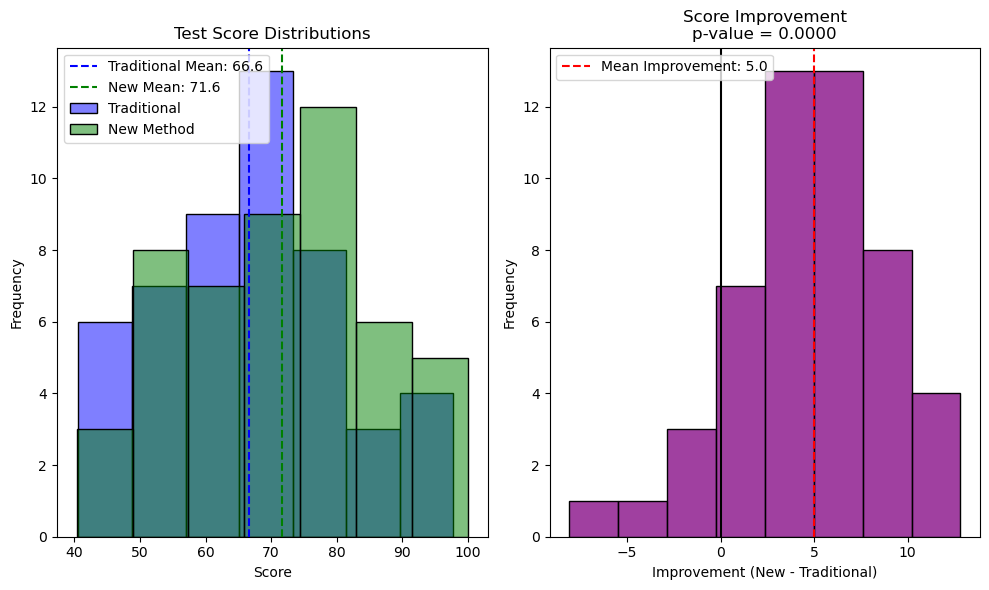

In [5]:
# Visualize the results
plt.figure(figsize=(10, 6))

# Plot 1: Score distributions
plt.subplot(1, 2, 1)
sns.histplot(study_data['Traditional'], color='blue', alpha=0.5, label='Traditional')
sns.histplot(study_data['New'], color='green', alpha=0.5, label='New Method')
plt.axvline(x=traditional_mean, color='blue', linestyle='--', label=f'Traditional Mean: {traditional_mean:.1f}')
plt.axvline(x=new_mean, color='green', linestyle='--', label=f'New Mean: {new_mean:.1f}')
plt.title('Test Score Distributions')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()

# Plot 2: Improvement distribution
plt.subplot(1, 2, 2)
sns.histplot(study_data['Improvement'], color='purple')
plt.axvline(x=mean_difference, color='red', linestyle='--', 
            label=f'Mean Improvement: {mean_difference:.1f}')
plt.axvline(x=0, color='black', linestyle='-')
plt.title(f'Score Improvement\np-value = {p_value:.4f}')
plt.xlabel('Improvement (New - Traditional)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

### Common Pitfalls

1. **Confusing statistical significance with practical significance**: A statistically significant result might not be large enough to matter in practice.

2. **Testing after seeing the data**: Forming hypotheses after examining results leads to p-hacking and false discoveries.

3. **Ignoring assumptions**: Many statistical tests have assumptions about data distributions that, when violated, can lead to incorrect conclusions.

4. **Overconfidence in results**: A single hypothesis test is just one piece of evidence, not definitive proof.

### Exercises

**Exercise 1.1**: Identify whether each of the following is a well-formed hypothesis, and if not, explain why:
- "Women are better at multitasking than men."
- "The average response time using Interface A is less than 2 seconds."
- "The customer satisfaction score improves after implementing the new service procedure."
- "Product A is better than Product B."

**Exercise 1.2**: For a study comparing a new diet plan to a standard diet, what would be appropriate components of a hypothesis test?

**Exercise 1.3**: Why is it problematic to look at your data first and then form a hypothesis about what you expect to see?

### Solutions

**Solution 1.1**:
- "Women are better at multitasking than men." - Not well-formed: Lacks specificity about how "better" is measured and doesn't specify a magnitude.
- "The average response time using Interface A is less than 2 seconds." - Well-formed: Specifies the metric (response time), the threshold (2 seconds), and what's being measured.
- "The customer satisfaction score improves after implementing the new service procedure." - Well-formed: Clearly identifies the metric (satisfaction score) and the expected direction of change.
- "Product A is better than Product B." - Not well-formed: "Better" is not defined by any specific metric or magnitude.

**Solution 1.2**:
- **Statement**: "The new diet plan results in at least 10% more weight loss on average compared to the standard diet over an 8-week period."
- **Population**: All people who could follow either diet plan
- **Sample**: The participants in our study
- **Test statistic**: Difference in mean weight loss percentage between the two diet groups
- **Sampling distribution**: Distribution of differences in weight loss if both diets were equally effective

**Solution 1.3**:
It's problematic because it introduces bias and invalidates the statistical testing framework. This is known as post-hoc hypothesis formulation or "HARKing" (Hypothesizing After Results are Known). When you form hypotheses after seeing results:
- You're no longer testing a hypothesis but merely describing what you've already observed
- The p-values become meaningless because they assume the hypothesis was formulated independently of the data
- You're likely to identify spurious patterns that don't generalize
- It increases the risk of false positives and overfitting to the specific dataset

This practice leads to unreproducible results and is a major contributor to the replication crisis in science.

## Null and Alternative Hypothesis <a name="null-and-alternative-hypothesis"></a>

### The Null and Alternative Framework

In hypothesis testing, we formulate two competing hypotheses:

1. **Null Hypothesis (H₀)**: The default position that there is no effect, no difference, or no relationship. It typically represents the status quo or the position of skepticism.

2. **Alternative Hypothesis (H₁ or Hₐ)**: The claim that the researcher wants to provide evidence for. It typically represents a change, effect, or relationship.

**Everyday Examples**:
- **H₀**: Average coffee consumption has no effect on productivity
- **H₁**: Higher coffee consumption is associated with higher productivity

- **H₀**: The average debt of college graduates = $30,000
- **H₁**: The average debt of college graduates > $30,000

**Future ML Application**: In machine learning, the null hypothesis might be that a feature has no predictive value, while the alternative is that it helps predict outcomes.

### Hypothesis Testing Process <a name="hypothesis-testing-process"></a>

The hypothesis testing process follows a structured approach:

1. Formulate the null and alternative hypotheses
2. Define a significance level (α)
3. Collect data and calculate test statistics
4. Determine the p-value
5. Make a decision: reject or fail to reject H₀
6. Interpret the results in context

**Example**:

Let's test whether a city's average commute time differs from the national average of 27.6 minutes.

- H₀: μ = 27.6 (The city's average commute time equals the national average)
- H₁: μ ≠ 27.6 (The city's average commute time differs from the national average)

### Type I and Type II Errors <a name="type-i-and-type-ii-errors"></a>

When making decisions in hypothesis testing, we can make two types of errors:

1. **Type I Error (False Positive)**: Rejecting a true null hypothesis
   - Example: Concluding the commute times differ when they actually don't
   - Probability: α (significance level)

2. **Type II Error (False Negative)**: Failing to reject a false null hypothesis
   - Example: Failing to detect a real difference in commute times
   - Probability: β (1 - β is the power of the test)

The relationship between these errors can be visualized as:

| | Null is True | Null is False |
|---|---|---|
| **Reject Null** | Type I Error (False Positive) | Correct Decision (True Positive) |
| **Fail to Reject Null** | Correct Decision (True Negative) | Type II Error (False Negative) |

**Future ML Application**: This error framework is very similar to the confusion matrix in classification problems, where we also deal with false positives and false negatives.

In [6]:
### Python Implementation

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Simulate commute time data
def generate_commute_data(n_samples=100, city_mean=29.2, std_dev=8.5):
    # Generate commute times (normally distributed)
    commute_times = np.random.normal(city_mean, std_dev, n_samples)
    
    # Ensure no negative commute times
    commute_times = np.clip(commute_times, 0, None)
    
    return commute_times

# Generate data
commute_times = generate_commute_data()
national_average = 27.6

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(commute_times, national_average)

# Calculate mean and standard error
sample_mean = np.mean(commute_times)
sample_std = np.std(commute_times, ddof=1)
standard_error = sample_std / np.sqrt(len(commute_times))

# Calculate 95% confidence interval
conf_int = stats.t.interval(0.95, len(commute_times)-1, loc=sample_mean, scale=standard_error)

print(f"Sample Mean: {sample_mean:.2f} minutes")
print(f"National Average: {national_average} minutes")
print(f"Difference: {sample_mean - national_average:.2f} minutes")
print(f"95% Confidence Interval: [{conf_int[0]:.2f}, {conf_int[1]:.2f}]")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Statistically Significant Difference? {'Yes' if p_value < 0.05 else 'No'}")

Sample Mean: 28.32 minutes
National Average: 27.6 minutes
Difference: 0.72 minutes
95% Confidence Interval: [26.79, 29.85]
T-statistic: 0.9292
P-value: 0.3550
Statistically Significant Difference? No


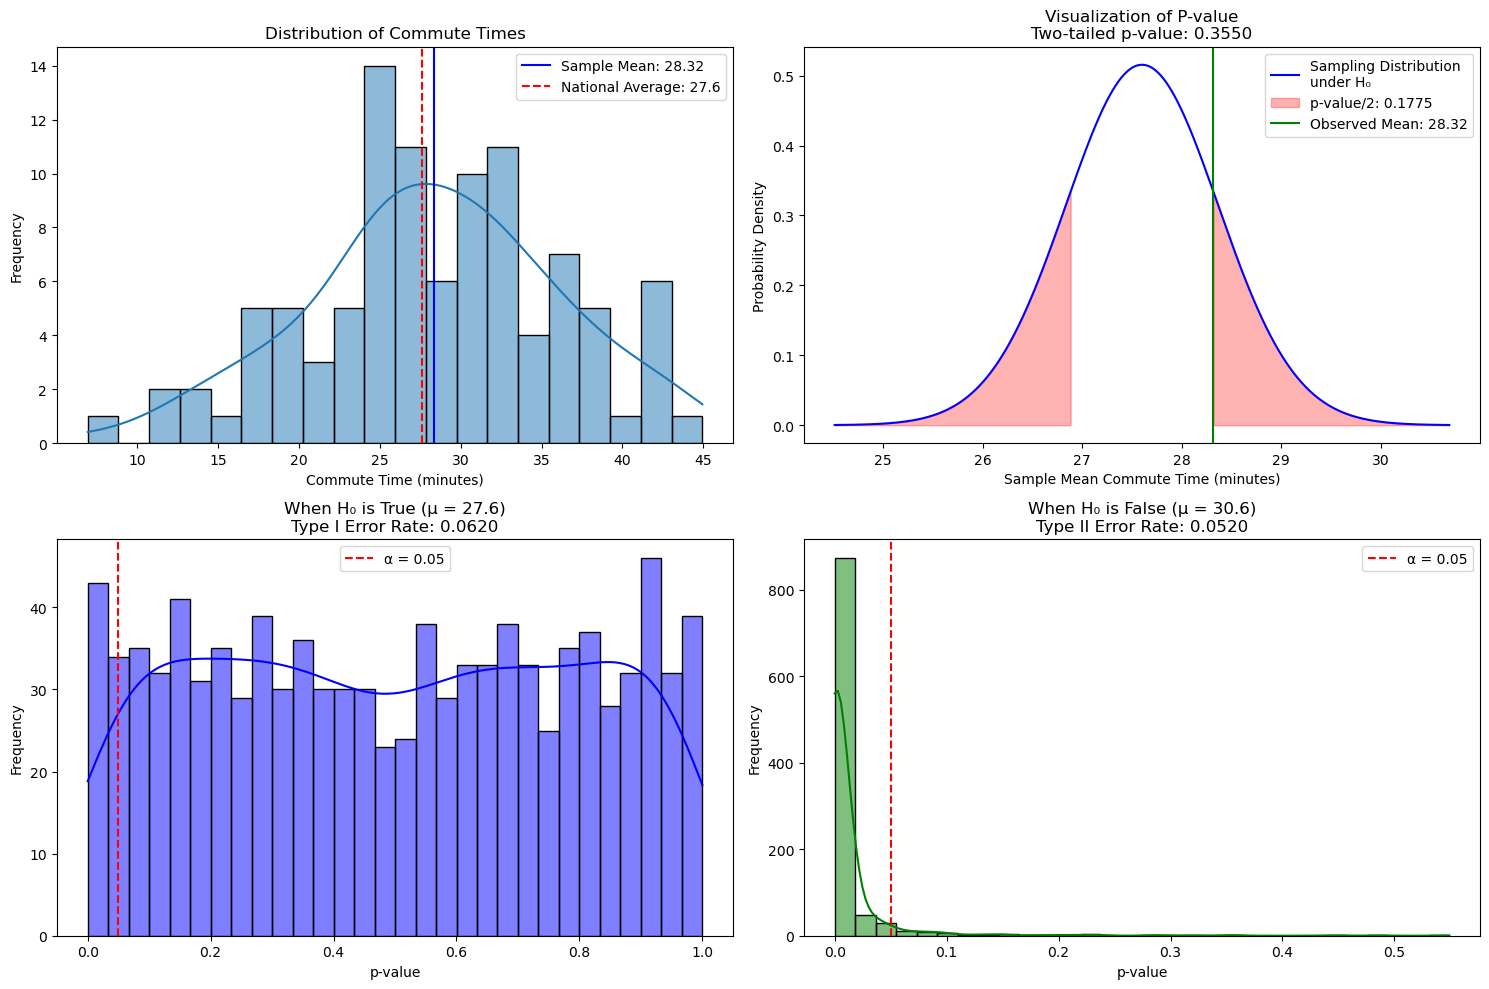

In [7]:
# Illustrate Type I and Type II errors
def simulate_hypothesis_test(true_mean, n_simulations=1000, sample_size=100, alpha=0.05):
    """
    Simulate hypothesis tests to demonstrate Type I and Type II errors.
    
    Parameters:
    - true_mean: The actual population mean (national_average = 27.6 is null)
    - n_simulations: Number of simulations to run
    - sample_size: Number of samples in each experiment
    - alpha: Significance level
    
    Returns:
    - Dictionary with simulation results
    """
    # Store results
    reject_null = np.zeros(n_simulations, dtype=bool)
    p_values = np.zeros(n_simulations)
    
    for i in range(n_simulations):
        # Generate sample data with the true mean
        sample = np.random.normal(true_mean, 8.5, sample_size)
        
        # Perform t-test
        t_stat, p_value = stats.ttest_1samp(sample, national_average)
        p_values[i] = p_value
        
        # Decision (two-tailed test)
        reject_null[i] = p_value < alpha
    
    # Calculate error rates
    if true_mean == national_average:  # Null is true
        type_i_error = np.mean(reject_null)
        return {
            'scenario': 'Null is True',
            'type_i_error': type_i_error,
            'p_values': p_values,
            'decisions': reject_null
        }
    else:  # Null is false
        power = np.mean(reject_null)
        type_ii_error = 1 - power
        return {
            'scenario': 'Null is False',
            'power': power,
            'type_ii_error': type_ii_error,
            'p_values': p_values,
            'decisions': reject_null
        }

# Simulate when null is true (city mean equals national average)
null_true_results = simulate_hypothesis_test(true_mean=national_average)

# Simulate when null is false (city mean differs from national average)
null_false_results = simulate_hypothesis_test(true_mean=30.6)  # 3 minute difference

# Visualize the results
plt.figure(figsize=(15, 10))

# Plot 1: Original commute data
plt.subplot(2, 2, 1)
sns.histplot(commute_times, bins=20, kde=True)
plt.axvline(x=sample_mean, color='blue', linestyle='-', label=f'Sample Mean: {sample_mean:.2f}')
plt.axvline(x=national_average, color='red', linestyle='--', label=f'National Average: {national_average}')
plt.title('Distribution of Commute Times')
plt.xlabel('Commute Time (minutes)')
plt.ylabel('Frequency')
plt.legend()

# Plot 2: P-value visualization
plt.subplot(2, 2, 2)
x = np.linspace(national_average - 4*standard_error, national_average + 4*standard_error, 1000)
y = stats.t.pdf(x, df=len(commute_times)-1, loc=national_average, scale=standard_error)
plt.plot(x, y, 'b-', label='Sampling Distribution\nunder H₀')

# Shade p-value area
if sample_mean > national_average:
    x_fill = np.linspace(sample_mean, national_average + 4*standard_error, 100)
    plt.fill_between(x_fill, stats.t.pdf(x_fill, df=len(commute_times)-1, 
                                        loc=national_average, scale=standard_error), 
                    color='red', alpha=0.3, label=f'p-value/2: {p_value/2:.4f}')
    x_fill_left = np.linspace(national_average - 4*standard_error, 2*national_average - sample_mean, 100)
    plt.fill_between(x_fill_left, stats.t.pdf(x_fill_left, df=len(commute_times)-1, 
                                            loc=national_average, scale=standard_error), 
                    color='red', alpha=0.3)
else:
    x_fill = np.linspace(national_average - 4*standard_error, sample_mean, 100)
    plt.fill_between(x_fill, stats.t.pdf(x_fill, df=len(commute_times)-1, 
                                        loc=national_average, scale=standard_error), 
                    color='red', alpha=0.3, label=f'p-value/2: {p_value/2:.4f}')
    x_fill_right = np.linspace(2*national_average - sample_mean, national_average + 4*standard_error, 100)
    plt.fill_between(x_fill_right, stats.t.pdf(x_fill_right, df=len(commute_times)-1, 
                                            loc=national_average, scale=standard_error), 
                    color='red', alpha=0.3)

plt.axvline(x=sample_mean, color='green', linestyle='-', label=f'Observed Mean: {sample_mean:.2f}')
plt.title(f'Visualization of P-value\nTwo-tailed p-value: {p_value:.4f}')
plt.xlabel('Sample Mean Commute Time (minutes)')
plt.ylabel('Probability Density')
plt.legend()

# Plot 3: Type I Error (False Positive)
plt.subplot(2, 2, 3)
sns.histplot(null_true_results['p_values'], bins=30, kde=True, color='blue')
plt.axvline(x=0.05, color='r', linestyle='--', label='α = 0.05')
plt.title(f"When H₀ is True (μ = 27.6)\nType I Error Rate: {null_true_results['type_i_error']:.4f}")
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend()

# Plot 4: Type II Error (False Negative)
plt.subplot(2, 2, 4)
sns.histplot(null_false_results['p_values'], bins=30, kde=True, color='green')
plt.axvline(x=0.05, color='r', linestyle='--', label='α = 0.05')
plt.title(f"When H₀ is False (μ = 30.6)\nType II Error Rate: {null_false_results['type_ii_error']:.4f}")
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

### Steps in Hypothesis Testing <a name="steps-in-hypothesis-testing"></a>

When applying hypothesis testing, follow these steps:

1. **Define your research question**: What specific claim do you want to test?

2. **Formulate hypotheses**:
   - H₀: The null hypothesis (typically no effect/difference)
   - H₁: The alternative hypothesis (the effect/difference you're looking for)

3. **Choose a significance level (α)**: Common values are 0.05, 0.01, or 0.001, with 0.05 being standard.

4. **Select an appropriate test**: Based on your data type, distribution, and specific question.

5. **Collect data and perform the test**: Calculate the test statistic and p-value.

6. **Make a decision**: Reject H₀ if p-value < α; otherwise, fail to reject H₀.

7. **Interpret the results in context**: What does this mean for your original question?

### Common Pitfalls

1. **Confusing "fail to reject H₀" with "accepting H₀"**: Failing to reject the null doesn't prove it's true; it means we lack sufficient evidence against it.

2. **Multiple testing problems**: Running many tests increases the probability of false positives. Use corrections like Bonferroni or False Discovery Rate.

3. **Over-reliance on p-values**: A p-value doesn't tell you about the size or practical importance of an effect.

4. **Ignoring statistical power**: Small sample sizes might fail to detect real effects (high Type II error rates).

### Exercises

**Exercise 2.1**: For each scenario, formulate appropriate null and alternative hypotheses:
- Testing if a new teaching method improves student test scores
- Comparing the average income between graduates of two different universities
- Determining if a new website design increases the average time users spend on the site

**Exercise 2.2**: In a clinical trial for a weight loss drug, falsely concluding that the drug works when it doesn't would expose patients to unnecessary side effects. Falsely concluding it doesn't work when it actually does would deprive patients of an effective treatment. Should you use a higher or lower significance level than the standard 0.05? Explain your reasoning.

**Exercise 2.3**: A researcher conducted 15 different hypothesis tests and found 2 with p-values below 0.05. Should they confidently conclude these two findings represent real effects? Why or why not?

### Solutions

**Solution 2.1**:

- Testing if a new teaching method improves student test scores:
  - H₀: μnew ≤ μtraditional (The new teaching method does not improve test scores)
  - H₁: μnew > μtraditional (The new teaching method improves test scores)

- Comparing the average income between graduates of two different universities:
  - H₀: μuniversity1 = μuniversity2 (Both universities' graduates have equal average incomes)
  - H₁: μuniversity1 ≠ μuniversity2 (The universities' graduates have different average incomes)

- Determining if a new website design increases the average time users spend on the site:
  - H₀: μnew ≤ μold (The new design does not increase average time on site)
  - H₁: μnew > μold (The new design increases average time on site)

**Solution 2.2**:
You should use a lower significance level (e.g., 0.01 instead of 0.05).

Reasoning: In this scenario, a Type I error (falsely concluding the drug works) has more serious consequences (exposing patients to unnecessary side effects) than a Type II error (missing an effective treatment, which can be discovered in future studies). A lower significance level makes it harder to reject the null hypothesis, reducing the risk of Type I errors at the expense of increasing Type II errors. This is appropriate when the cost of false positives is particularly high, as in medical settings where patient safety is paramount.

**Solution 2.3**:
No, they should not confidently conclude these two findings represent real effects without further validation.

Reasoning: With 15 different tests at α = 0.05, we would expect 15 × 0.05 = 0.75 (roughly 1) test to be significant by chance alone. Finding 2 significant results is only slightly more than the expected false positive rate. This is the multiple testing problem. To address this, they should:

1. Apply a multiple testing correction (e.g., Bonferroni correction would adjust the significance threshold to 0.05/15 = 0.0033)
2. Validate the significant results with new data or replication studies
3. Consider the practical significance (effect size) beyond just statistical significance
4. Be transparent about the number of tests conducted when reporting results

## Confidence Intervals and Uncertainty <a name="confidence-intervals-and-uncertainty"></a>

### Confidence Intervals <a name="confidence-intervals"></a>

A confidence interval provides a range of plausible values for a population parameter, along with a measure of confidence (usually expressed as a percentage) that the true parameter lies within this range.

While p-values tell you whether an effect exists, confidence intervals tell you how large that effect might be – which is often more valuable for decision-making.

**Everyday Examples**:
- "The average household income is $68,000 with a 95% confidence interval of [$65,500, $70,500]."
- "The difference in test scores between the two teaching methods is 7.2 points (95% CI: 3.1 to 11.3 points)."

**Format of Confidence Intervals**:
- Point estimate ± margin of error
- Example: 68,000 ± 2,500

A 95% confidence interval means that if you were to repeat your sampling process many times, about 95% of the resulting confidence intervals would contain the true population parameter.

**Future ML Application**: In machine learning, confidence intervals can be used to quantify uncertainty in model predictions and performance metrics.

### Margin of Error <a name="margin-of-error"></a>

The margin of error determines the width of a confidence interval and is calculated as:

Margin of Error = Critical Value × Standard Error

Where:
- The **critical value** comes from the sampling distribution (e.g., t or normal distribution)
- The **standard error** is a measure of the variability of the sampling distribution

For a mean with known population standard deviation σ:
Standard Error = σ/√n

For a mean with unknown population standard deviation:
Standard Error = s/√n (where s is the sample standard deviation)

**Factors affecting the margin of error**:
1. **Confidence level**: Higher confidence requires wider intervals
2. **Sample size**: Larger samples reduce the margin of error (√n in denominator)
3. **Variability**: More variable data leads to wider intervals

### Confidence Levels <a name="confidence-levels"></a>

The confidence level represents how frequently the true parameter will fall within the intervals if the sampling process is repeated.

Common confidence levels include:
- 90% confidence intervals (wider than 50% but narrower than 95%)
- 95% confidence intervals (standard in most fields)
- 99% confidence intervals (wider, used when more certainty is needed)

**Trade-off**: Increasing the confidence level widens the interval. You gain more confidence at the expense of precision.`m

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Simulate salary data
def generate_salary_data(n_samples=200, population_mean=68000, population_std=18000):
    # Generate salaries (normally distributed)
    salaries = np.random.normal(population_mean, population_std, n_samples)
    return salaries

# Generate data
salaries = generate_salary_data()

# Calculate statistics
sample_mean = np.mean(salaries)
sample_std = np.std(salaries, ddof=1)
sample_size = len(salaries)
standard_error = sample_std / np.sqrt(sample_size)

# Calculate confidence intervals for different confidence levels
confidence_levels = [0.5, 0.8, 0.9, 0.95, 0.99]
intervals = {}

for conf_level in confidence_levels:
    # Get the critical value (t-distribution with n-1 degrees of freedom)
    critical_value = stats.t.ppf((1 + conf_level) / 2, df=sample_size - 1)
    
    # Calculate margin of error
    margin_of_error = critical_value * standard_error
    
    # Calculate confidence interval
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    
    intervals[conf_level] = {
        'critical_value': critical_value,
        'margin_of_error': margin_of_error,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'width': upper_bound - lower_bound
    }

# Print results
print(f"Sample Mean: ${sample_mean:.2f}")
print(f"Sample Standard Deviation: ${sample_std:.2f}")
print(f"Standard Error: ${standard_error:.2f}")
print("\nConfidence Intervals:")
for level, values in intervals.items():
    print(f"{level*100:.0f}% CI: [${values['lower_bound']:.2f}, ${values['upper_bound']:.2f}], "
          f"Width: ${values['width']:.2f}, Critical Value: {values['critical_value']:.3f}")

Sample Mean: $67266.12
Sample Standard Deviation: $16758.07
Standard Error: $1184.97

Confidence Intervals:
50% CI: [$66465.41, $68066.84], Width: $1601.43, Critical Value: 0.676
80% CI: [$65742.46, $68789.79], Width: $3047.33, Critical Value: 1.286
90% CI: [$65307.90, $69224.35], Width: $3916.45, Critical Value: 1.653
95% CI: [$64929.40, $69602.84], Width: $4673.44, Critical Value: 1.972
99% CI: [$64184.29, $70347.96], Width: $6163.67, Critical Value: 2.601


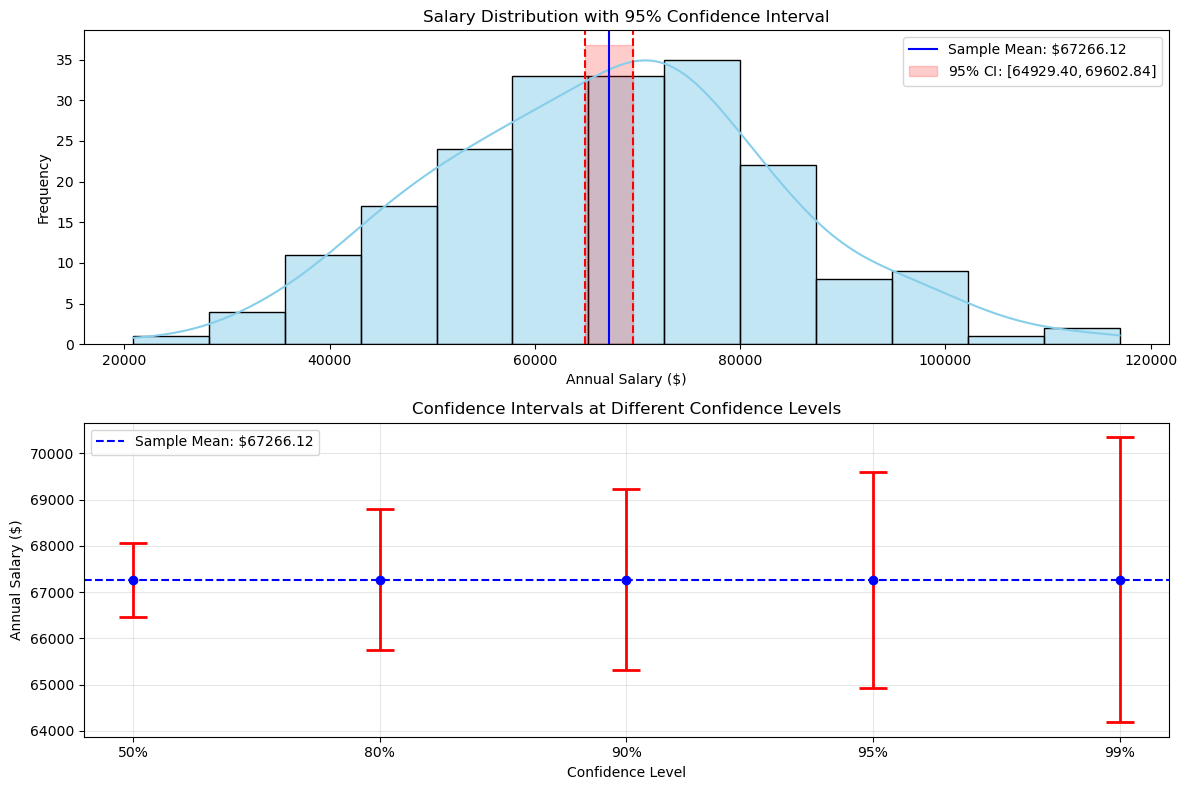

In [9]:
# Visualize confidence intervals
plt.figure(figsize=(12, 8))

# Plot 1: Salary distribution with confidence interval
plt.subplot(2, 1, 1)
sns.histplot(salaries, kde=True, color='skyblue')
plt.axvline(x=sample_mean, color='blue', linestyle='-', label=f'Sample Mean: ${sample_mean:.2f}')
plt.axvline(x=intervals[0.95]['lower_bound'], color='red', linestyle='--')
plt.axvline(x=intervals[0.95]['upper_bound'], color='red', linestyle='--')
plt.fill_betweenx([0, plt.gca().get_ylim()[1]], 
                 intervals[0.95]['lower_bound'], 
                 intervals[0.95]['upper_bound'], 
                 color='red', alpha=0.2, 
                 label=f'95% CI: [${intervals[0.95]["lower_bound"]:.2f}, ${intervals[0.95]["upper_bound"]:.2f}]')
plt.title('Salary Distribution with 95% Confidence Interval')
plt.xlabel('Annual Salary ($)')
plt.ylabel('Frequency')
plt.legend()

# Plot 2: Confidence interval widths for different confidence levels
plt.subplot(2, 1, 2)
level_labels = [f"{level*100:.0f}%" for level in confidence_levels]
widths = [intervals[level]['width'] for level in confidence_levels]
lower_bounds = [intervals[level]['lower_bound'] for level in confidence_levels]
upper_bounds = [intervals[level]['upper_bound'] for level in confidence_levels]

plt.errorbar(level_labels, [sample_mean] * len(confidence_levels), 
             yerr=np.array([(sample_mean - lower_bounds), (upper_bounds - sample_mean)]),
             fmt='o', capsize=10, color='blue', ecolor='red', elinewidth=2, capthick=2)
plt.axhline(y=sample_mean, color='blue', linestyle='--', label=f'Sample Mean: ${sample_mean:.2f}')
plt.title('Confidence Intervals at Different Confidence Levels')
plt.xlabel('Confidence Level')
plt.ylabel('Annual Salary ($)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

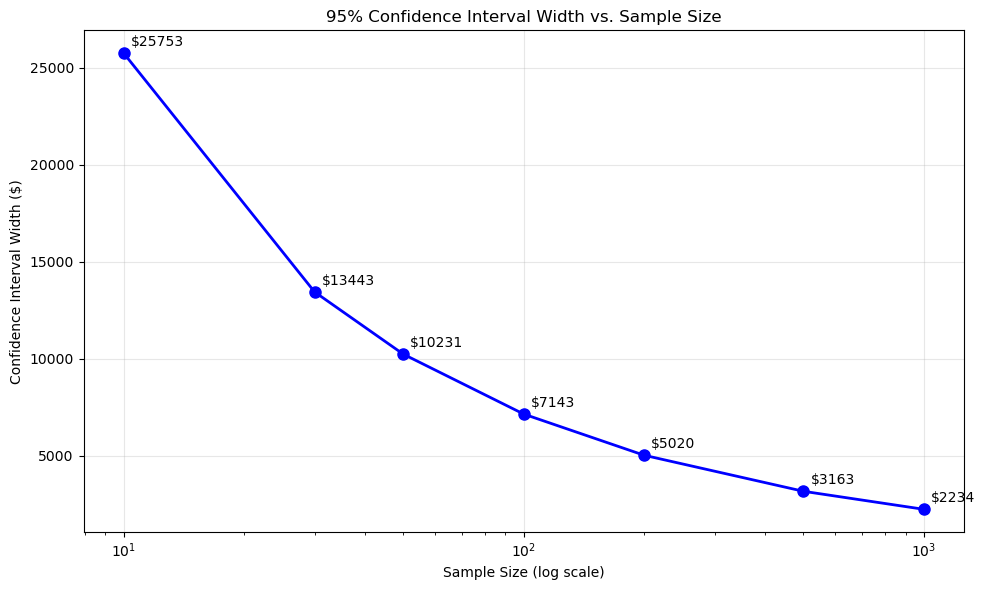

In [10]:
# Demonstrate effect of sample size on confidence interval width
def ci_width_by_sample_size(population_mean=68000, population_std=18000, confidence_level=0.95):
    sample_sizes = [10, 30, 50, 100, 200, 500, 1000]
    widths = []
    
    for n in sample_sizes:
        # Standard error for this sample size
        se = population_std / np.sqrt(n)
        
        # Critical value from t-distribution
        critical_value = stats.t.ppf((1 + confidence_level) / 2, df=n-1)
        
        # Margin of error
        margin_of_error = critical_value * se
        
        # Width of CI
        width = 2 * margin_of_error
        widths.append(width)
    
    return sample_sizes, widths

# Get data for plot
sample_sizes, ci_widths = ci_width_by_sample_size()

# Plot relationship between sample size and CI width
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, ci_widths, 'bo-', linewidth=2, markersize=8)
plt.xscale('log')
plt.title('95% Confidence Interval Width vs. Sample Size')
plt.xlabel('Sample Size (log scale)')
plt.ylabel('Confidence Interval Width ($)')
plt.grid(True, alpha=0.3)
for i, (size, width) in enumerate(zip(sample_sizes, ci_widths)):
    plt.annotate(f'${width:.0f}', 
                 xy=(size, width), 
                 xytext=(5, 5),
                 textcoords='offset points')
plt.tight_layout()
plt.show()

### Common Pitfalls

1. **Misinterpreting confidence intervals**: A 95% CI doesn't mean there's a 95% probability that the true parameter falls within the interval. It means that if you were to repeat the sampling process many times, about 95% of the resulting intervals would contain the true parameter.

2. **Ignoring practical significance**: Even if a confidence interval doesn't include zero (statistical significance), the interval might still include values that are practically meaningless.

3. **Using confidence intervals to make individual predictions**: Confidence intervals apply to population parameters, not individual observations.

4. **Overconfidence in narrow intervals**: Narrow confidence intervals from limited data might suggest false precision.

### Exercises

**Exercise 3.1**: A survey finds that the average time spent on social media is 65 minutes per day with a standard deviation of 25 minutes, based on a sample of 100 respondents. Calculate and interpret the 95% confidence interval for the population mean.

**Exercise 3.2**: Two teaching methods are compared. Method A produces an average score of 78 with a 95% confidence interval of [74, 82]. Method B produces an average score of 82 with a 95% confidence interval of [76, 88]. Can you conclude that Method B is significantly better than Method A? Explain your reasoning.

**Exercise 3.3**: How would the width of a 95% confidence interval for the mean change in each of these scenarios?
   a) Sample size increases from 100 to 400
   b) You switch from 95% to 99% confidence
   c) The data becomes more variable (larger standard deviation)

### Solutions

**Solution 3.1**:
To calculate the 95% confidence interval:

1. Calculate the standard error:
   SE = s/√n = 25/√100 = 25/10 = 2.5

2. For a 95% confidence interval with n=100, the critical value from the t-distribution with 99 degrees of freedom is approximately 1.984 (very close to the z-score 1.96)

3. Margin of Error = Critical Value × Standard Error = 1.984 × 2.5 ≈ 4.96

4. 95% CI = Sample Mean ± Margin of Error = 65 ± 4.96 = [60.04, 69.96]

Interpretation: We are 95% confident that the true population mean time spent on social media is between 60.04 and 69.96 minutes per day. This means if we were to take many different samples and compute a 95% confidence interval for each one, about 95% of those intervals would contain the true population mean.

**Solution 3.2**:
No, we cannot conclude that Method B is significantly better than Method A.

Reasoning: Although Method B has a higher average score (82 vs. 78), the confidence intervals overlap substantially. The fact that Method A's upper bound (82) equals Method B's point estimate suggests that the true population means could be identical. Since the confidence intervals overlap, the difference between methods is not statistically significant at the 95% confidence level.

To formally determine if there's a significant difference, we would need to conduct a hypothesis test comparing the two means directly or calculate a confidence interval for the difference between means. Based just on the overlapping confidence intervals, we do not have strong evidence that Method B is better than Method A.

**Solution 3.3**:
a) When sample size increases from 100 to 400, the confidence interval width would decrease by approximately half. This is because the standard error is inversely proportional to the square root of the sample size (SE ∝ 1/√n). Since 400 = 4 × 100, the new standard error would be 1/√4 = 1/2 of the original, making the confidence interval about half as wide.

b) Switching from a 95% to a 99% confidence level would make the interval wider. The 95% confidence interval uses a z-score of approximately 1.96, while the 99% confidence interval uses a z-score of approximately 2.58. This means the margin of error would increase by a factor of about 2.58/1.96 ≈ 1.32, making the confidence interval about 32% wider.

c) If the data becomes more variable (larger standard deviation), the confidence interval would become wider. The standard error is directly proportional to the standard deviation of the data (SE ∝ σ). So if the standard deviation increases by 20%, the confidence interval width increases by 20% as well.

## Statistical Distributions for Testing <a name="statistical-distributions-for-testing"></a>

### Z-Distribution (Standard Normal) <a name="z-distribution"></a>

The Z-distribution, or standard normal distribution, is a special case of the normal distribution with mean 0 and standard deviation 1. It serves as the foundation for many statistical tests.

**Key Properties**:
- Bell-shaped, symmetric curve
- Mean = 0, Standard deviation = 1
- About 68% of values fall within ±1, 95% within ±1.96, and 99.7% within ±3

**When to Use**:
- Large sample sizes (n ≥ 30)
- Known population standard deviation
- Comparing a sample mean to a population mean
- Working with proportions from large samples

**Z-score Transformation**:
Z = (X - μ) / σ

This transformation converts any normally distributed variable to the standard normal distribution, making it easier to find probabilities and critical values.

**Examples**:
- Standardizing test scores to compare students from different schools
- Determining if a patient's blood pressure is abnormally high relative to the population
- Calculating the probability of a measurement exceeding a certain threshold

**Future ML Application**: Z-scores are used for feature scaling, outlier detection, and normalizing inputs to machine learning models.

### T-Distribution <a name="t-distribution"></a>

The t-distribution is similar to the normal distribution but has heavier tails, making it more appropriate when working with small samples or when the population standard deviation is unknown.

**Key Properties**:
- Bell-shaped and symmetric, but with heavier tails than the normal distribution
- Characterized by degrees of freedom (df), typically n-1 for a sample of size n
- As df increases, the t-distribution approaches the normal distribution

**When to Use**:
- Small sample sizes (n < 30)
- Unknown population standard deviation
- Comparing means of small samples

**T-statistic Calculation**:
t = (X̄ - μ) / (s / √n)

Where s is the sample standard deviation.

**Examples**:
- Testing if the average customer satisfaction score differs from the target value
- Comparing if two teaching methods yield different average test scores
- Determining if a new process affects the mean production time

**Future ML Application**: T-tests are commonly used for feature selection and comparing the performance of different machine learning models.

### Choosing Between T and Z Tests <a name="choosing-between-t-and-z-tests"></a>

Here's a quick guide for when to use each test:

| Consideration | Z-Test | T-Test |
|---------------|--------|--------|
| Sample Size | Large (n ≥ 30) | Small or Large |
| Population σ | Known | Unknown (use sample s) |
| Robustness | Less robust to non-normality | More robust option |
| Use Cases | Large sample proportion tests | Small sample mean comparisons |

In practice, you'll most often use t-tests because:
- Population parameters are rarely known
- T-tests are more conservative (wider confidence intervals)
- Modern computing makes t-tests just as easy to compute as z-tests

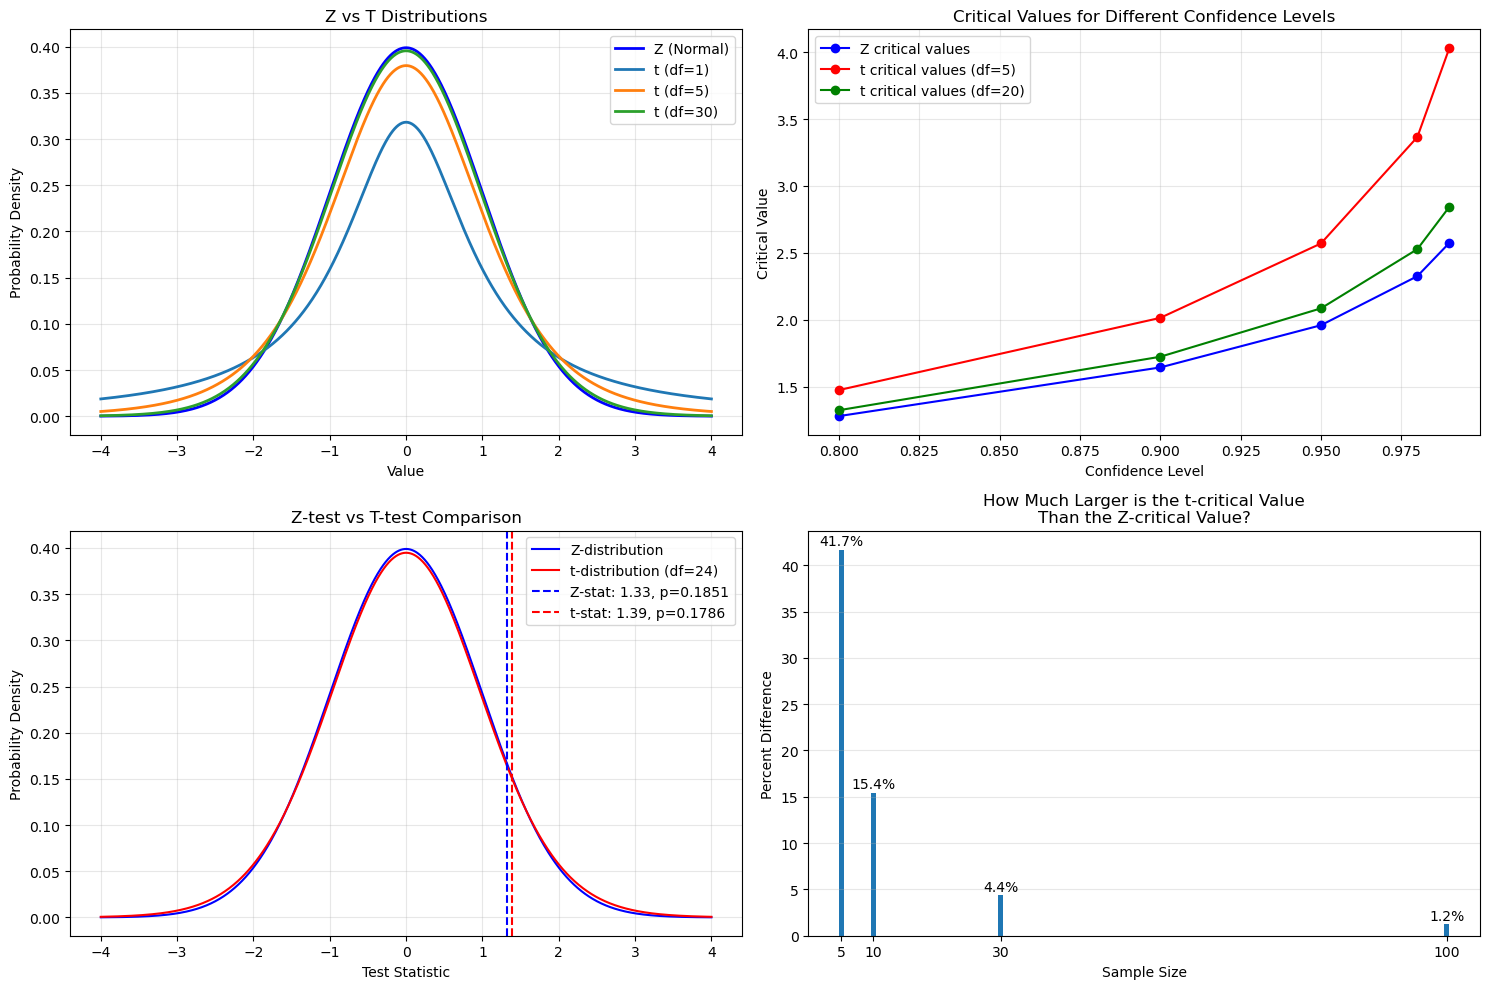

In [11]:
### Python Implementation

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Plot Z vs T distributions
plt.figure(figsize=(15, 10))

# Plot 1: Z vs T distributions with different degrees of freedom
plt.subplot(2, 2, 1)
x = np.linspace(-4, 4, 1000)
plt.plot(x, stats.norm.pdf(x), 'b-', lw=2, label='Z (Normal)')
for df in [1, 5, 30]:
    plt.plot(x, stats.t.pdf(x, df), lw=2, label=f't (df={df})')
plt.title('Z vs T Distributions')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Critical values comparison
plt.subplot(2, 2, 2)
confidence_levels = [0.8, 0.9, 0.95, 0.98, 0.99]
z_critical = [stats.norm.ppf(1 - (1-cl)/2) for cl in confidence_levels]
t_critical_df5 = [stats.t.ppf(1 - (1-cl)/2, 5) for cl in confidence_levels]
t_critical_df20 = [stats.t.ppf(1 - (1-cl)/2, 20) for cl in confidence_levels]

plt.plot(confidence_levels, z_critical, 'bo-', label='Z critical values')
plt.plot(confidence_levels, t_critical_df5, 'ro-', label='t critical values (df=5)')
plt.plot(confidence_levels, t_critical_df20, 'go-', label='t critical values (df=20)')
plt.title('Critical Values for Different Confidence Levels')
plt.xlabel('Confidence Level')
plt.ylabel('Critical Value')
plt.legend()
plt.grid(alpha=0.3)

# Example of Z-test vs T-test for sample mean
# Generate a dataset: student heights
heights = np.random.normal(loc=173, scale=7, size=25)  # 25 students, mean height 173 cm, sd 7 cm
sample_mean = np.mean(heights)
sample_std = np.std(heights, ddof=1)
population_mean = 170  # National average height
population_std = 7     # Known population standard deviation

# Z-test (if we know the population standard deviation)
z_stat = (sample_mean - population_mean) / (population_std / np.sqrt(len(heights)))
z_pval = 2 * (1 - stats.norm.cdf(abs(z_stat)))  # Two-tailed

# T-test (if we don't know the population standard deviation)
t_stat = (sample_mean - population_mean) / (sample_std / np.sqrt(len(heights)))
t_pval = 2 * (1 - stats.t.cdf(abs(t_stat), df=len(heights)-1))  # Two-tailed

# Plot 3: Visualize both tests on the same data
plt.subplot(2, 2, 3)
x_range = np.linspace(-4, 4, 1000)
plt.plot(x_range, stats.norm.pdf(x_range), 'b-', label='Z-distribution')
plt.plot(x_range, stats.t.pdf(x_range, df=len(heights)-1), 'r-', label='t-distribution (df=24)')
plt.axvline(x=z_stat, color='blue', linestyle='--', label=f'Z-stat: {z_stat:.2f}, p={z_pval:.4f}')
plt.axvline(x=t_stat, color='red', linestyle='--', label=f't-stat: {t_stat:.2f}, p={t_pval:.4f}')
plt.title('Z-test vs T-test Comparison')
plt.xlabel('Test Statistic')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(alpha=0.3)

# Plot 4: Impact of sample size on t vs z
plt.subplot(2, 2, 4)
sample_sizes = [5, 10, 30, 100]
diff_percent = []

for n in sample_sizes:
    z_crit = stats.norm.ppf(0.975)
    t_crit = stats.t.ppf(0.975, df=n-1)
    percent_diff = ((t_crit - z_crit) / z_crit) * 100
    diff_percent.append(percent_diff)

plt.bar(sample_sizes, diff_percent)
plt.title('How Much Larger is the t-critical Value\nThan the Z-critical Value?')
plt.xlabel('Sample Size')
plt.ylabel('Percent Difference')
plt.xticks(sample_sizes)
for i, v in enumerate(diff_percent):
    plt.text(sample_sizes[i], v + 0.5, f"{v:.1f}%", ha='center')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Create a practical example: comparing two teaching methods
def simulate_teaching_methods():
    # Method A: Traditional teaching
    method_a_scores = np.random.normal(loc=75, scale=12, size=15)
    
    # Method B: New approach (slightly better)
    method_b_scores = np.random.normal(loc=82, scale=10, size=15)
    
    # Independent t-test (for independent samples)
    t_stat, p_val = stats.ttest_ind(method_b_scores, method_a_scores, equal_var=False)
    
    return {
        'method_a': method_a_scores,
        'method_b': method_b_scores,
        't_statistic': t_stat,
        'p_value': p_val
    }

# Run simulation
teaching_results = simulate_teaching_methods()

# Create visualization for the teaching methods comparison
plt.figure(figsize=(12, 6))

# Plot 1: Boxplots of scores
plt.subplot(1, 2, 1)
data = pd.DataFrame({
    'Traditional': teaching_results['method_a'],
    'New Approach': teaching_results['method_b']
})
sns.boxplot(data=data)
plt.title('Test Scores by Teaching Method')
plt.ylabel('Score')
plt.grid(axis='y', alpha=0.3)

# Plot 2: Distribution of scores with statistical test result
plt.subplot(1, 2, 2)
sns.kdeplot(teaching_results['method_a'], label='Traditional')
sns.kdeplot(teaching_results['method_b'], label='New Approach')
plt.title(f"Comparison of Teaching Methods\nt={teaching_results['t_statistic']:.2f}, p={teaching_results['p_value']:.4f}")
plt.xlabel('Test Score')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Common Pitfalls

1. **Using Z-tests when T-tests are more appropriate**: If you're unsure about the population standard deviation (which is usually the case), use a t-test.

2. **Ignoring the normality assumption**: Both tests assume data is normally distributed. For non-normal data with small samples, consider non-parametric alternatives or bootstrapping.

3. **Using two-sample tests for paired data**: When comparing before/after scenarios, use paired tests.

4. **Overlooking effect size**: Statistical significance (from any test) doesn't tell you if an effect is large enough to be practically important.

### Exercises

**Exercise 4.1**: A health researcher wants to determine if the average cholesterol level in a community differs from the national average of 190 mg/dL. She collects data from 18 randomly selected individuals. Would you recommend a Z-test or a T-test? Explain your reasoning.

**Exercise 4.2**: If you increase your sample size from 15 to 60 while using a T-test, how would this affect:
   a) The width of your confidence intervals?
   b) The difference between using a T-test vs. a Z-test?

**Exercise 4.3**: A manufacturer claims that their light bulbs last 1000 hours on average. You test 40 bulbs and find a mean lifetime of 980 hours with a standard deviation of 120 hours. Using the appropriate test, determine if there's evidence to reject the manufacturer's claim at a significance level of 0.05.

### Solutions

**Solution 4.1**:
I would recommend a T-test for this situation. The reasoning is:

1. Small sample size: With only 18 individuals, we're well below the rule of thumb threshold of 30 for "large" samples
2. Unknown population standard deviation: We don't know the true standard deviation of cholesterol levels in the population
3. Conservative approach: T-tests provide wider confidence intervals than Z-tests for small samples, which is more appropriate when uncertainty is high
4. Better error control: T-tests help avoid Type I errors (false positives) when sample sizes are small

The researcher should use a one-sample t-test to compare the sample mean to the national average of 190 mg/dL.

**Solution 4.2**:
a) The width of confidence intervals would decrease by approximately √(15/60) = √(1/4) = 1/2 or 50%. This is because the standard error is proportional to 1/√n, so quadrupling the sample size halves the standard error and thus halves the confidence interval width.

b) The difference between using a T-test vs. a Z-test would diminish substantially. With n = 15, the t-distribution with 14 degrees of freedom has noticeably heavier tails than the normal distribution, resulting in wider confidence intervals. With n = 60, the t-distribution with 59 degrees of freedom is much closer to the normal distribution. Specifically:
   - For 95% confidence, the critical value for t(14) is ≈ 2.145 while for z it's 1.96 (9.4% difference)
   - For 95% confidence, the critical value for t(59) is ≈ 2.001 while for z it's 1.96 (2.1% difference)
   
This means the practical difference between the tests becomes negligible with the larger sample size.

**Solution 4.3**:
Step 1: Set up the hypothesis.
- H₀: μ = 1000 hours (The mean lifetime equals the manufacturer's claim)
- H₁: μ ≠ 1000 hours (The mean lifetime differs from the manufacturer's claim)

Step 2: Choose the appropriate test.
Since n = 40 > 30, we could use either a z-test or t-test. However, since we don't know the population standard deviation, a t-test is more appropriate.

Step 3: Calculate the test statistic.
t = (x̄ - μ) / (s / √n)
t = (980 - 1000) / (120 / √40)
t = -20 / (120 / 6.325)
t = -20 / 18.97
t = -1.054

Step 4: Find the critical value.
For a two-tailed test with α = 0.05 and df = 39, the critical t-value is ±2.023.

Step 5: Make a decision.
Since |-1.054| < 2.023, we fail to reject the null hypothesis.

Step 6: Interpret the result.
There is insufficient evidence to reject the manufacturer's claim that the light bulbs last 1000 hours on average. The observed difference of 20 hours could reasonably be due to sampling variability rather than a true difference in the population mean.

## P-Values and Decision Making <a name="p-values-and-decision-making"></a>

### Understanding P-Values <a name="understanding-p-values"></a>

A p-value is the probability of obtaining results at least as extreme as those observed, assuming the null hypothesis is true. Despite being commonly misunderstood, p-values are central to hypothesis testing and statistical decision-making.

**Formal Definition**:
The p-value is P(data | H₀), not P(H₀ | data). It's the probability of getting data this extreme if the null hypothesis were true, not the probability that the null hypothesis is true given your data.

**P-value Interpretation**:
- Small p-value (typically < 0.05): Strong evidence against the null hypothesis
- Large p-value: Insufficient evidence against the null hypothesis

**What p-values DO tell you**:
- The compatibility of your data with the null hypothesis
- Whether your result is statistically significant according to your chosen threshold

**What p-values DO NOT tell you**:
- The probability that your null hypothesis is true or false
- The size or importance of an effect
- The probability that your results occurred by chance
- The probability that your results will replicate

**Examples**:
- If p = 0.03 when testing if a coin is fair, it means if the coin were actually fair, you'd see results at least as extreme as yours about 3% of the time.
- If p = 0.20 when comparing two medications, it means if there were truly no difference between medications, you'd see a difference at least as large as observed about 20% of the time.

**Future ML Application**: In feature selection for machine learning, p-values help determine which variables have a statistically significant relationship with the target variable.

### Making Decisions Using P-Values <a name="making-decisions-using-p-values"></a>

While p-values help with decision making, they should be used carefully and in conjunction with other information.

**Traditional Approach**:
1. Set a significance level α (typically 0.05)
2. Calculate the p-value
3. If p < α, reject H₀; otherwise, fail to reject H₀

**Modern Best Practices**:
1. Report exact p-values rather than just "significant" or "not significant"
2. Consider practical significance (effect size) alongside statistical significance
3. Use confidence intervals to estimate effect size
4. Adjust for multiple comparisons when performing many tests
5. Consider statistical power and sample size

**Practical Significance**: A statistically significant result (small p-value) might not be practically meaningful if the effect size is too small to matter in real-world applications.

In [14]:
### Python Implementation

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Example 1: P-value in action - testing if a coin is fair
def coin_toss_simulation(n_tosses=100, true_prob=0.5, n_simulations=10000):
    """Simulate multiple sets of coin tosses and calculate p-values."""
    # Actual coin toss experiment
    heads = np.random.binomial(n_tosses, true_prob)
    observed_proportion = heads / n_tosses
    
    # Calculate p-value using binomial test (updated method)
    p_value_exact = stats.binomtest(heads, n=n_tosses, p=0.5).pvalue
    
    # Simulation approach to p-value
    simulated_heads = np.random.binomial(n_tosses, 0.5, n_simulations)
    simulated_proportions = simulated_heads / n_tosses
    
    # Two-tailed p-value: proportion of simulations at least as extreme as observed
    deviation = abs(observed_proportion - 0.5)
    sim_deviations = abs(simulated_proportions - 0.5)
    p_value_sim = np.mean(sim_deviations >= deviation)
    
    return {
        'tosses': n_tosses,
        'heads': heads,
        'observed_proportion': observed_proportion,
        'p_value_exact': p_value_exact,
        'p_value_sim': p_value_sim,
        'simulated_proportions': simulated_proportions
    }

# Run simulation
coin_results = coin_toss_simulation(n_tosses=100, true_prob=0.6)  # Actually biased coin

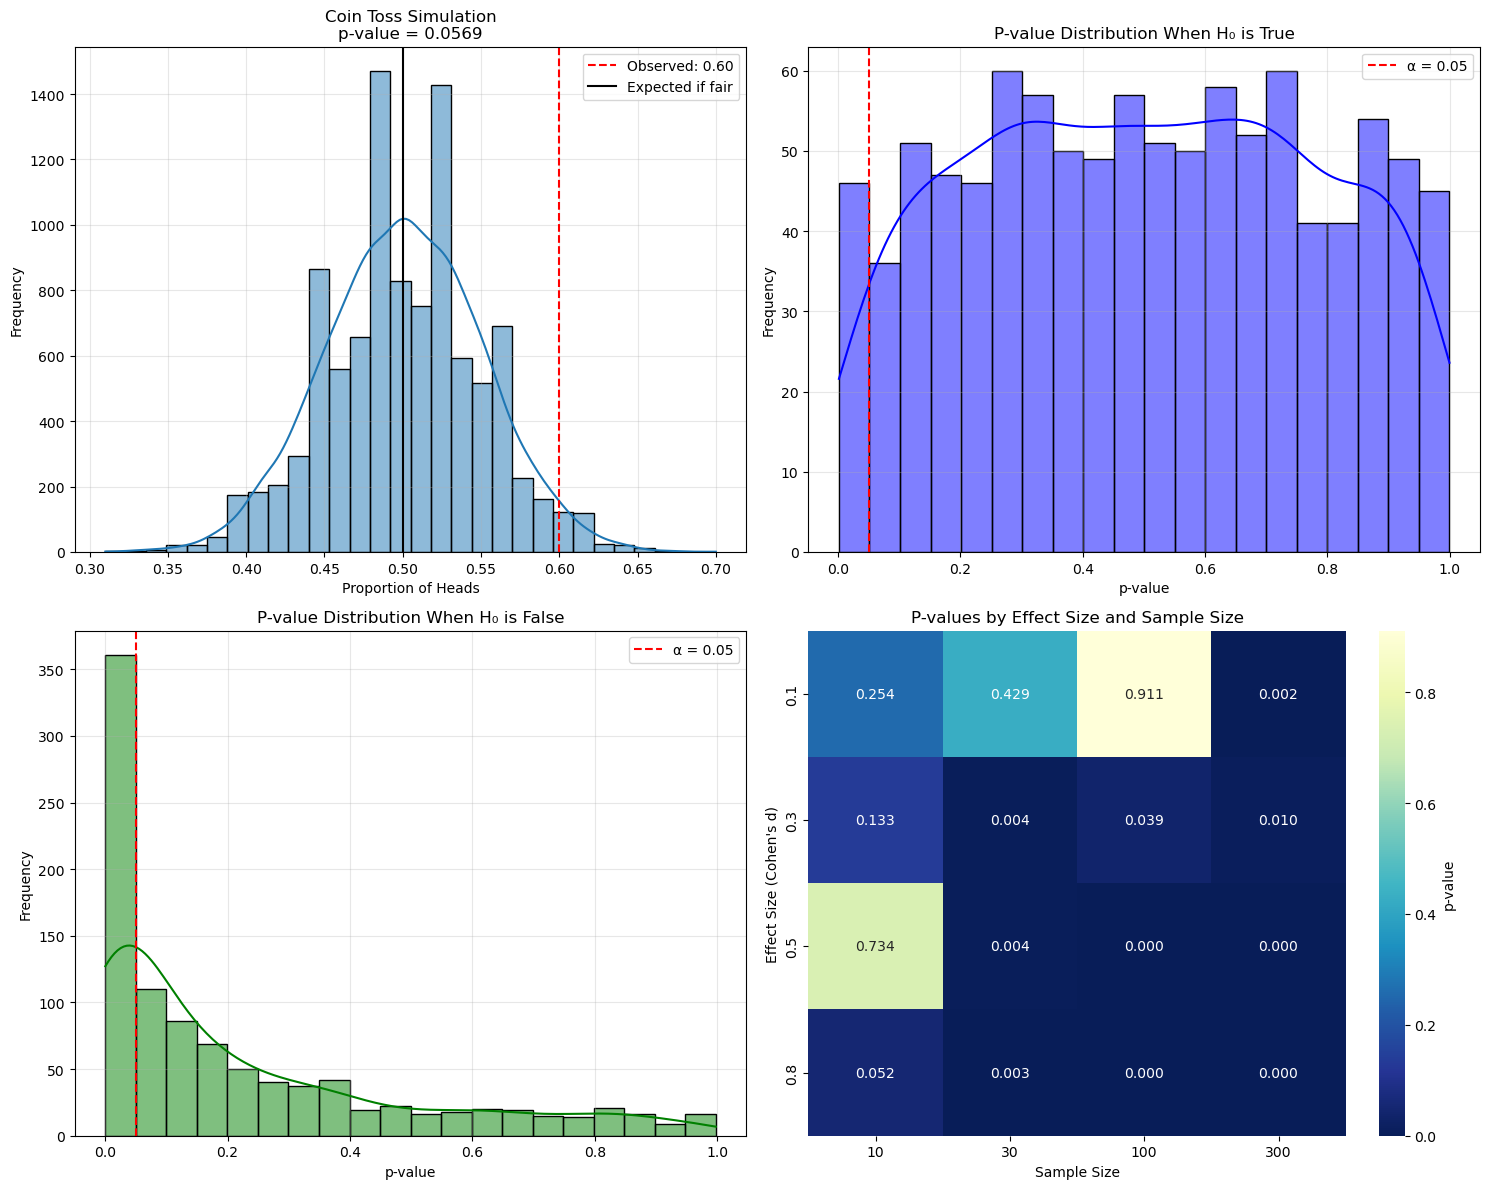

In [15]:
# Example 2: Demonstrate p-value misconceptions
def p_value_misconceptions():
    """Demonstrate common misconceptions about p-values."""
    # 1. Under H0, p-values are uniformly distributed
    np.random.seed(42)
    n_simulations = 1000
    p_values_under_null = []
    
    for _ in range(n_simulations):
        # Generate two samples from same distribution (null is true)
        sample1 = np.random.normal(0, 1, 20)
        sample2 = np.random.normal(0, 1, 20)
        _, p_value = stats.ttest_ind(sample1, sample2)
        p_values_under_null.append(p_value)
    
    # 2. When null is false, p-values tend to be smaller
    p_values_under_alternative = []
    
    for _ in range(n_simulations):
        # Generate two samples from different distributions (null is false)
        sample1 = np.random.normal(0, 1, 20)
        sample2 = np.random.normal(0.5, 1, 20)  # Different mean
        _, p_value = stats.ttest_ind(sample1, sample2)
        p_values_under_alternative.append(p_value)
    
    return {
        'null_true': p_values_under_null,
        'null_false': p_values_under_alternative
    }

# Run p-value misconceptions simulation
p_value_results = p_value_misconceptions()

# Example 3: P-value vs. effect size
def p_value_vs_effect_size():
    """Demonstrate relationship between p-value, effect size, and sample size."""
    effect_sizes = [0.1, 0.3, 0.5, 0.8]  # Cohen's d values
    sample_sizes = [10, 30, 100, 300]
    results = []
    
    for d in effect_sizes:
        for n in sample_sizes:
            # Calculate means based on effect size (assuming sd=1)
            mean1 = 0
            mean2 = d  # Effect size = (mean2 - mean1) / sd
            
            # Generate data
            group1 = np.random.normal(mean1, 1, n)
            group2 = np.random.normal(mean2, 1, n)
            
            # Calculate t-test and p-value
            t_stat, p_value = stats.ttest_ind(group1, group2)
            
            results.append({
                'effect_size': d,
                'sample_size': n,
                'p_value': p_value,
                'significant': p_value < 0.05
            })
    
    return pd.DataFrame(results)

# Run effect size simulation
effect_size_results = p_value_vs_effect_size()

# Visualize the results
plt.figure(figsize=(15, 12))

# Plot 1: Coin toss simulation
plt.subplot(2, 2, 1)
sns.histplot(coin_results['simulated_proportions'], bins=30, kde=True)
plt.axvline(x=coin_results['observed_proportion'], color='red', linestyle='--',
            label=f"Observed: {coin_results['observed_proportion']:.2f}")
plt.axvline(x=0.5, color='black', linestyle='-', label="Expected if fair")
plt.title(f"Coin Toss Simulation\np-value = {coin_results['p_value_exact']:.4f}")
plt.xlabel('Proportion of Heads')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: P-value distribution when null is true
plt.subplot(2, 2, 2)
sns.histplot(p_value_results['null_true'], bins=20, kde=True, color='blue')
plt.axvline(x=0.05, color='red', linestyle='--', label='α = 0.05')
plt.title('P-value Distribution When H₀ is True')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.3)

# Plot 3: P-value distribution when null is false
plt.subplot(2, 2, 3)
sns.histplot(p_value_results['null_false'], bins=20, kde=True, color='green')
plt.axvline(x=0.05, color='red', linestyle='--', label='α = 0.05')
plt.title('P-value Distribution When H₀ is False')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.3)

# Plot 4: Effect size, sample size, and p-value relationship
plt.subplot(2, 2, 4)
pivot_data = effect_size_results.pivot(index='effect_size', columns='sample_size', values='p_value')
sns.heatmap(pivot_data, annot=True, fmt='.3f', cmap='YlGnBu_r', cbar_kws={'label': 'p-value'})
plt.title('P-values by Effect Size and Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Effect Size (Cohen\'s d)')
plt.grid(False)

plt.tight_layout()
plt.show()

Let me continue with the remainder of the comprehensive guide on hypothesis testing for data analysis:

In [16]:
def study_tool_example():
    """Create example data and analysis for study tool effectiveness."""
    # Generate data
    np.random.seed(42)
    
    # Student test scores with standard method
    standard_scores = np.random.normal(loc=72, scale=12, size=35)
    
    # New study tool - small positive effect (+5 points on average)
    new_tool_scores = np.random.normal(loc=77, scale=11, size=35)
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(new_tool_scores, standard_scores)
    
    # Calculate effect size (Cohen's d)
    pooled_std = np.sqrt(((len(standard_scores) - 1) * np.var(standard_scores, ddof=1) + 
                       (len(new_tool_scores) - 1) * np.var(new_tool_scores, ddof=1)) / 
                      (len(standard_scores) + len(new_tool_scores) - 2))
    
    effect_size = (np.mean(new_tool_scores) - np.mean(standard_scores)) / pooled_std
    
    # Results dictionary
    results = {
        'standard_mean': np.mean(standard_scores),
        'new_tool_mean': np.mean(new_tool_scores),
        'mean_difference': np.mean(new_tool_scores) - np.mean(standard_scores),
        'standard_scores': standard_scores,
        'new_tool_scores': new_tool_scores,
        't_statistic': t_stat,
        'p_value': p_value,
        'effect_size': effect_size,
        'significant': p_value < 0.05
    }
    
    return results

# Run study tool example
study_results = study_tool_example()

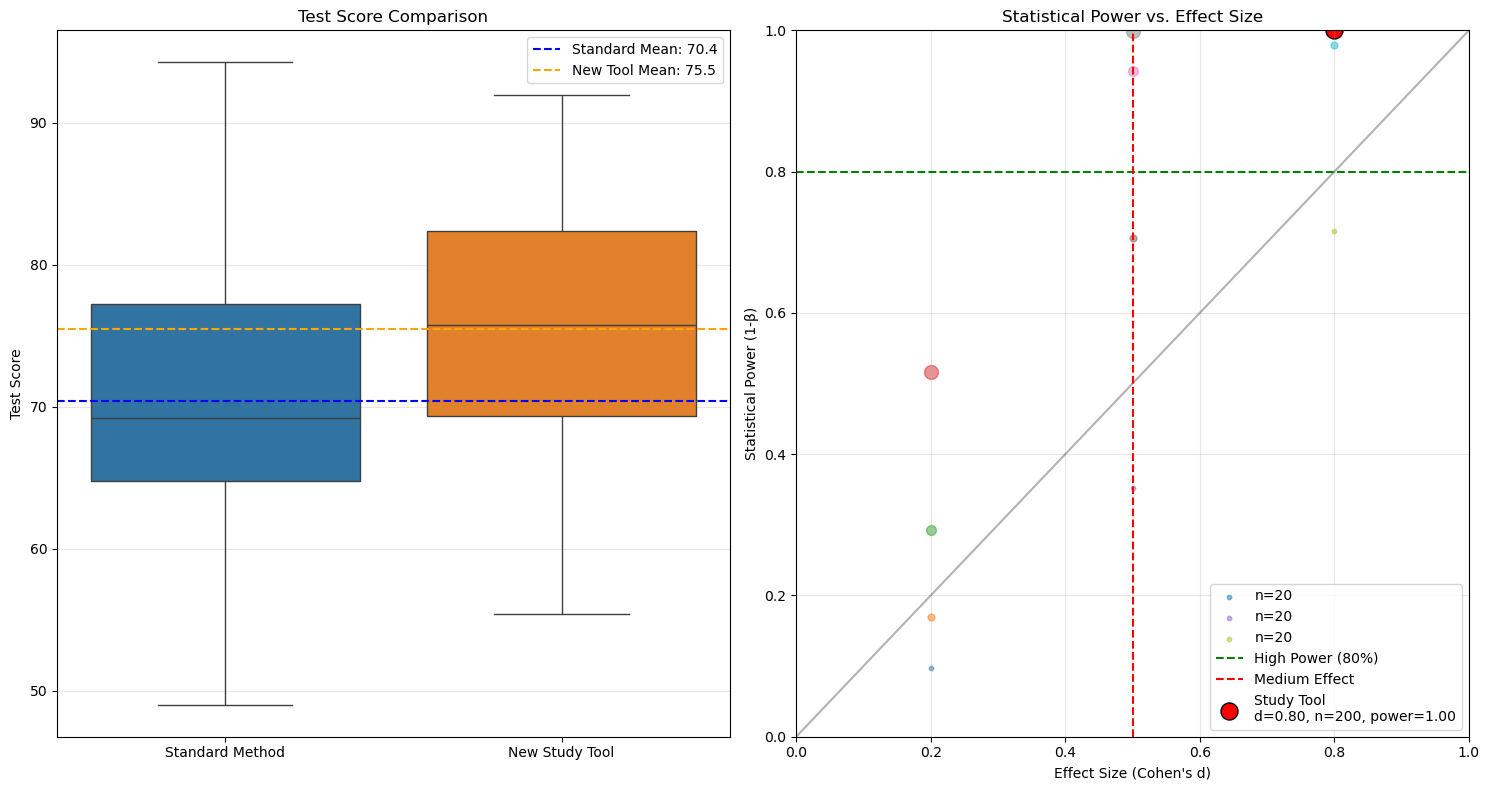

In [17]:
# Visualize study tool results
plt.figure(figsize=(15, 8))

# Plot 1: Score comparison
plt.subplot(1, 2, 1)
data = pd.DataFrame({
    'Standard Method': study_results['standard_scores'],
    'New Study Tool': study_results['new_tool_scores']
})
sns.boxplot(data=data)
plt.axhline(y=study_results['standard_mean'], color='blue', linestyle='--', 
           label=f"Standard Mean: {study_results['standard_mean']:.1f}")
plt.axhline(y=study_results['new_tool_mean'], color='orange', linestyle='--',
           label=f"New Tool Mean: {study_results['new_tool_mean']:.1f}")
plt.title('Test Score Comparison')
plt.ylabel('Test Score')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Plot 2: Decision framework
plt.subplot(1, 2, 2)
x = np.linspace(0, 1, 100)
plt.plot(x, x, 'k-', alpha=0.3)  # Diagonal line

# Create scatter points for different scenarios
effect_sizes = [0.2, 0.5, 0.8]
sizes = [20, 50, 100, 200]
points = []

for d in effect_sizes:
    for n in sizes:
        # Approximate power calculation
        power = stats.norm.cdf(
            d*np.sqrt(n/2) - stats.norm.ppf(0.975)
        ) + stats.norm.cdf(
            -d*np.sqrt(n/2) - stats.norm.ppf(0.975)
        )
        points.append((d, power, n))

# Add study tool result
d = study_results['effect_size']
n = len(study_results['standard_scores'])
power = stats.norm.cdf(
    d*np.sqrt(n/2) - stats.norm.ppf(0.975)
) + stats.norm.cdf(
    -d*np.sqrt(n/2) - stats.norm.ppf(0.975)
)

# Plot reference points
for d, power, n in points:
    plt.scatter(d, power, s=n/2, alpha=0.5, label=f"n={n}" if n==20 else "")

# Add regions
plt.axhline(y=0.8, color='green', linestyle='--', label="High Power (80%)")
plt.axvline(x=0.5, color='red', linestyle='--', label="Medium Effect")

# Highlight study example
plt.scatter(abs(d), power, s=150, color='red', edgecolor='black', 
           label=f"Study Tool\nd={d:.2f}, n={n}, power={power:.2f}")

plt.title('Statistical Power vs. Effect Size')
plt.xlabel('Effect Size (Cohen\'s d)')
plt.ylabel('Statistical Power (1-β)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(alpha=0.3)
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [18]:
# Print study tool results
print(f"Study Tool Results:")
print(f"Standard Method Mean: {study_results['standard_mean']:.2f}")
print(f"New Study Tool Mean: {study_results['new_tool_mean']:.2f}")
print(f"Mean Difference: {study_results['mean_difference']:.2f}")
print(f"T-statistic: {study_results['t_statistic']:.2f}")
print(f"P-value: {study_results['p_value']:.4f}")
print(f"Effect Size (Cohen's d): {study_results['effect_size']:.2f}")
print(f"Statistically Significant? {'Yes' if study_results['significant'] else 'No'}")

Study Tool Results:
Standard Method Mean: 70.41
New Study Tool Mean: 75.50
Mean Difference: 5.09
T-statistic: 2.04
P-value: 0.0457
Effect Size (Cohen's d): 0.49
Statistically Significant? Yes


### Common Pitfalls

1. **Misinterpreting p-values**: A common error is thinking p = 0.04 means there's a 4% chance the null hypothesis is true or a 96% chance the alternative is true.

2. **P-hacking**: Manipulating data or analyses until reaching statistical significance (p < 0.05) invalidates the statistical framework.

3. **Publication bias**: Only publishing significant results creates a distorted view of evidence.

4. **Ignoring multiple comparisons**: When testing many hypotheses, the chance of false positives increases dramatically without correction.

5. **Confusing statistical significance with practical significance**: A tiny effect can be statistically significant with a large enough sample.

### Exercises

**Exercise 5.1**: You're testing whether a new teaching method improves test scores. After analyzing the data, you obtain a p-value of 0.03. Which of the following statements is a correct interpretation of this p-value?
   a) There's a 3% chance that the new teaching method doesn't improve scores.
   b) There's a 97% chance that the new teaching method improves scores.
   c) If the new teaching method truly had no effect, we would observe a difference at least as large as the one in our sample about 3% of the time.
   d) 3% of students will not benefit from the new teaching method.

**Exercise 5.2**: A researcher tests 15 different nutritional supplements to see if they affect plant growth. Two supplements show statistically significant effects with p-values of 0.02 and 0.04. Should the researcher confidently conclude these two supplements have real effects? Explain your reasoning.

**Exercise 5.3**: A company is testing two website designs. Design A has a conversion rate of 5.2% based on 500 visitors. Design B has a conversion rate of 6.1% based on 500 visitors. The p-value for this difference is 0.32. The company needs at least a 15% relative improvement in conversion to justify the cost of implementing a new design. What decision would you recommend and why?

### Solutions

**Solution 5.1**:
The correct answer is c) If the new teaching method truly had no effect, we would observe a difference at least as large as the one in our sample about 3% of the time.

This is the proper interpretation of a p-value: the probability of obtaining results at least as extreme as those observed, assuming the null hypothesis is true. The p-value does not tell us the probability that the null hypothesis is true (answer a) or that the alternative hypothesis is true (answer b). It also doesn't tell us anything about the proportion of individuals who benefit from the treatment (answer d).

**Solution 5.2**:
The researcher should not confidently conclude that these two supplements have real effects without further validation.

Reasoning: With 15 different tests at α = 0.05, we would expect 15 × 0.05 = 0.75 (roughly 1) test to be significant by chance alone. Finding 2 significant results isn't much higher than the expected false positive rate. This is the multiple testing problem.

To address this issue, the researcher should:
1. Apply a multiple testing correction (e.g., Bonferroni correction would adjust the significance threshold to 0.05/15 = 0.0033)
2. Validate the significant results with new experiments
3. Consider the practical significance (effect size) of the observed differences
4. Be transparent about the number of tests conducted when reporting results

After applying a Bonferroni correction, neither supplement would meet the adjusted significance threshold of 0.0033.

**Solution 5.3**:
Recommendation: Do not implement Design B.

Reasoning: There are two key factors to consider here:
1. Statistical significance: With a p-value of 0.32, the difference between the conversion rates is not statistically significant. This means the observed difference of 0.9 percentage points (6.1% - 5.2%) could reasonably be due to random chance.

2. Practical significance: The company requires at least a 15% relative improvement to justify implementation costs. The observed relative improvement is (6.1% - 5.2%) / 5.2% = 17.3%, which does technically exceed the 15% threshold.

However, since the difference is not statistically significant, we cannot be confident that the observed 17.3% improvement represents a real effect rather than random variation. The high p-value (0.32) suggests there's a substantial probability (32%) of observing this difference or larger even if both designs perform equally well.

I would recommend:
- Not implementing Design B based on current evidence
- Collecting more data (increasing sample size) to achieve greater statistical power
- Considering A/B testing with a larger sample to detect if the observed difference is real

## Common Statistical Tests <a name="common-statistical-tests"></a>

### T-Tests <a name="t-tests"></a>

T-tests are among the most commonly used statistical tests for comparing means. They're essential for determining if differences between groups are statistically significant.

**Types of T-tests**:

1. **One-sample t-test**: Compares a sample mean to a known value
   - Example: Testing if the average exam score is different from 70 points

2. **Independent two-sample t-test**: Compares means of two independent groups
   - Example: Comparing test scores between two different schools

3. **Paired t-test**: Compares means of two related groups (matched observations)
   - Example: Comparing students' scores before and after a training program

**Key Assumptions**:
- Approximately normally distributed data (or differences in the paired case)
- Independent observations (except for paired test)
- No extreme outliers

**When to Use**:
- Comparing means between groups
- Testing if a mean differs from a target value
- Measuring the impact of an intervention

**Future ML Application**: T-tests are used in feature selection to determine which variables have a significant relationship with the target variable.

### Chi-Square Tests <a name="chi-square-tests"></a>

Chi-square tests analyze categorical data and are useful for examining relationships between categorical variables.

**Types of Chi-square Tests**:

1. **Chi-square goodness-of-fit test**: Tests if observed frequencies match expected frequencies
   - Example: Testing if the distribution of customer types matches historical data

2. **Chi-square test of independence**: Tests if two categorical variables are related
   - Example: Testing if education level is related to employment status

**Key Assumptions**:
- Random sampling
- Independent observations
- Large expected frequencies (typically > 5 in each cell)

**When to Use**:
- Analyzing categorical data
- Testing for relationships between categorical variables
- Comparing observed distributions to expected distributions

**Future ML Application**: Chi-square tests help identify categorical features that have significant relationships with categorical target variables.

### ANOVA <a name="anova"></a>

Analysis of Variance (ANOVA) compares means across three or more groups, extending the t-test concept to multiple groups.

**Types of ANOVA**:

1. **One-way ANOVA**: Compares means across groups based on one factor
   - Example: Comparing test scores across three different teaching methods

2. **Two-way ANOVA**: Analyzes the effect of two factors
   - Example: Examining how both teaching method and class size affect test scores

3. **Repeated measures ANOVA**: For related observations across multiple conditions
   - Example: Measuring student performance at three different time points

**Key Assumptions**:
- Normally distributed data within groups
- Homogeneity of variances
- Independent samples (except for repeated measures)

**When to Use**:
- Comparing means across three or more groups
- Analyzing the effect of multiple factors
- Investigating interactions between factors

**Future ML Application**: ANOVA can help evaluate different model configurations or hyperparameter settings.

### Correlation Tests <a name="correlation-tests"></a>

Correlation tests measure the strength and direction of relationships between continuous variables.

**Types of Correlation Tests**:

1. **Pearson correlation**: Measures linear relationship between two variables
   - Example: Testing if height and weight are linearly related

2. **Spearman rank correlation**: Measures monotonic relationship (not necessarily linear)
   - Example: Testing if customer satisfaction scores correlate with loyalty metrics

3. **Kendall's tau**: Another non-parametric measure of ordinal association
   - Example: Testing agreement between two judges' rankings

**Key Assumptions**:
- For Pearson: Linearity, normality, homoscedasticity
- For Spearman and Kendall: Variables are at least ordinal

**When to Use**:
- Measuring the strength of relationships between variables
- Testing if two variables are related
- Checking for multicollinearity in data

**Future ML Application**: Correlation tests help identify potentially useful features and redundant features in a dataset.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Set random seed for reproducibility
np.random.seed(42)

In [20]:
# 1. T-test example: Comparing two teaching methods
def t_test_example():
    # Generate data
    method_a = np.random.normal(75, 15, 40)  # mean=75, sd=15, n=40
    method_b = np.random.normal(82, 14, 40)  # mean=82, sd=14, n=40
    
    # Perform independent t-test
    t_stat, p_val = stats.ttest_ind(method_b, method_a, equal_var=False)
    
    # Calculate effect size (Cohen's d)
    effect_size = (np.mean(method_b) - np.mean(method_a)) / np.sqrt(
        ((len(method_a) - 1) * np.var(method_a, ddof=1) + 
         (len(method_b) - 1) * np.var(method_b, ddof=1)) / 
        (len(method_a) + len(method_b) - 2)
    )
    
    return {
        'method_a': method_a,
        'method_b': method_b,
        't_statistic': t_stat,
        'p_value': p_val,
        'effect_size': effect_size,
        'mean_a': np.mean(method_a),
        'mean_b': np.mean(method_b),
        'diff': np.mean(method_b) - np.mean(method_a)
    }

In [21]:
# 2. Chi-square example: Education level vs. employment status
def chi_square_example():
    # Create a contingency table
    # Rows: Education level (High School, College, Graduate)
    # Columns: Employment status (Employed, Unemployed)
    contingency_table = np.array([
        [150, 50],   # High School
        [200, 30],   # College
        [180, 20]    # Graduate
    ])
    
    # Perform chi-square test
    chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Create a DataFrame for better visualization
    df = pd.DataFrame(
        contingency_table,
        index=['High School', 'College', 'Graduate'],
        columns=['Employed', 'Unemployed']
    )
    
    # Calculate row percentages
    row_totals = df.sum(axis=1)
    row_percentages = df.div(row_totals, axis=0) * 100
    
    return {
        'contingency_table': df,
        'chi2': chi2,
        'p_value': p_val,
        'dof': dof,
        'expected': expected,
        'row_percentages': row_percentages
    }

In [22]:
# 3. ANOVA example: Comparing three teaching methods
def anova_example():
    # Generate data for three teaching methods
    method_a = np.random.normal(75, 15, 30)  # Traditional
    method_b = np.random.normal(82, 14, 30)  # Interactive
    method_c = np.random.normal(79, 13, 30)  # Online
    
    # Combine data for ANOVA
    all_scores = np.concatenate([method_a, method_b, method_c])
    method_labels = np.concatenate([
        np.repeat('Traditional', 30),
        np.repeat('Interactive', 30),
        np.repeat('Online', 30)
    ])
    
    # Create DataFrame
    df = pd.DataFrame({
        'score': all_scores,
        'method': method_labels
    })
    
    # Perform one-way ANOVA
    model = ols('score ~ C(method)', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    # Post-hoc test (Tukey's HSD)
    tukey = pairwise_tukeyhsd(endog=df['score'], groups=df['method'], alpha=0.05)
    
    return {
        'data': df,
        'anova_table': anova_table,
        'tukey_results': tukey,
        'means': df.groupby('method')['score'].mean()
    }

In [23]:
# 4. Correlation example: Height vs. weight
def correlation_example():
    # Generate correlated data
    n = 100
    np.random.seed(42)
    x = np.random.normal(175, 10, n)  # Heights (cm)
    # Generate weights with some correlation to height plus noise
    y = 0.65 * x - 75 + np.random.normal(0, 10, n)  # Weights (kg)
    
    # Calculate correlation coefficients
    pearson_r, pearson_p = stats.pearsonr(x, y)
    spearman_r, spearman_p = stats.spearmanr(x, y)
    
    # Create DataFrame
    df = pd.DataFrame({
        'height': x,
        'weight': y
    })
    
    return {
        'data': df,
        'pearson_r': pearson_r,
        'pearson_p': pearson_p,
        'spearman_r': spearman_r,
        'spearman_p': spearman_p
    }

In [28]:
# Run all examples
t_test_results = t_test_example()
chi_square_results = chi_square_example()
anova_results = anova_example()
correlation_results = correlation_example()

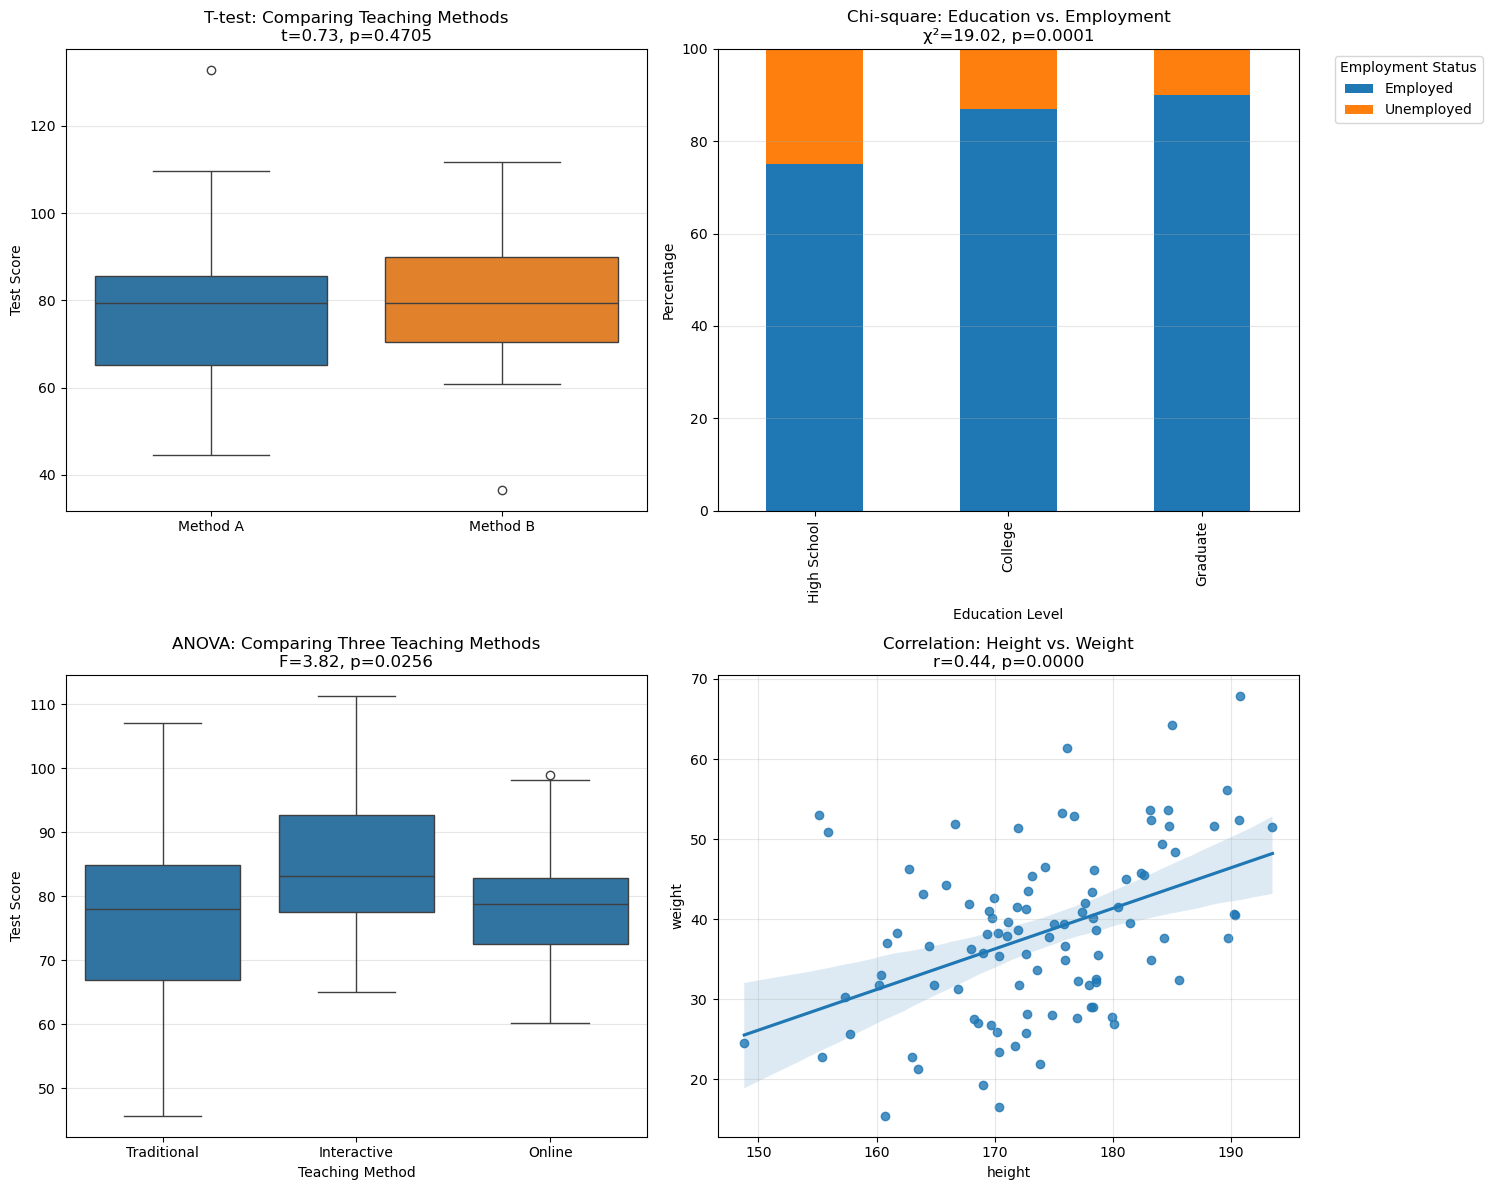

In [31]:
plt.figure(figsize=(15, 12))

# Plot 1: T-test example
plt.subplot(2, 2, 1)
sns.boxplot(data=pd.DataFrame({
    'Method A': t_test_results['method_a'],
    'Method B': t_test_results['method_b']
}))
plt.title(f'T-test: Comparing Teaching Methods\nt={t_test_results["t_statistic"]:.2f}, p={t_test_results["p_value"]:.4f}')
plt.ylabel('Test Score')
plt.grid(axis='y', alpha=0.3)

# Plot 2: Chi-square example
plt.subplot(2, 2, 2)
# Fallback plotting for chi-square results
chi_data = chi_square_results['row_percentages']
if isinstance(chi_data, pd.DataFrame):
    chi_data.plot(kind='bar', stacked=True, ax=plt.gca())
else:
    plt.bar(range(len(chi_data)), chi_data)
plt.title(f'Chi-square: Education vs. Employment\nχ²={chi_square_results["chi2"]:.2f}, p={chi_square_results["p_value"]:.4f}')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.xlabel('Education Level')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

# Plot 3: ANOVA example
plt.subplot(2, 2, 3)
sns.boxplot(x='method', y='score', data=anova_results['data'])
plt.title(f'ANOVA: Comparing Three Teaching Methods\nF={anova_results["anova_table"].iloc[0]["F"]:.2f}, p={anova_results["anova_table"].iloc[0]["PR(>F)"]:.4f}')
plt.xlabel('Teaching Method')
plt.ylabel('Test Score')
plt.grid(axis='y', alpha=0.3)

# Plot 4: Correlation example
plt.subplot(2, 2, 4)
corr_data = correlation_results['data']
if isinstance(corr_data, pd.DataFrame):
    sns.regplot(x='height', y='weight', data=corr_data)
else:
    plt.scatter(corr_data[:, 0], corr_data[:, 1])
    plt.xlabel('Height (cm)')
    plt.ylabel('Weight (kg)')
plt.title(f'Correlation: Height vs. Weight\nr={correlation_results["pearson_r"]:.2f}, p={correlation_results["pearson_p"]:.4f}')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Common Pitfalls

1. **Using the wrong test**: Each test has specific assumptions and applications. Using an inappropriate test can lead to incorrect conclusions.

2. **Ignoring test assumptions**: While modern tests are somewhat robust to violations, extreme departures from assumptions can invalidate results.

3. **Over-reliance on p-values**: Statistical significance doesn't always imply practical significance. Effect sizes provide more context.

4. **Multiple testing without correction**: When performing multiple tests, corrections are necessary to control the false discovery rate.

### Exercises

**Exercise 6.1**: A researcher wants to determine if there's a difference in average daily screen time between students in three different grade levels (10th, 11th, and 12th). Which statistical test would be most appropriate, and why?

**Exercise 6.2**: A marketing team wants to determine if customer satisfaction (measured on a scale of 1-10) is related to whether customers make repeat purchases (yes/no). Which statistical test should they use?

**Exercise 6.3**: A company implements a new training program and measures employee productivity before and after the training. For each employee, they have paired measurements. Which statistical test should they use to determine if the training increased productivity?

### Solutions

**Solution 6.1**:
The most appropriate test would be a one-way ANOVA (Analysis of Variance).

Reasoning:
1. We're comparing means across three independent groups (10th, 11th, and 12th grade students)
2. The dependent variable (screen time) is continuous
3. We want to test if there are any significant differences among the three grade levels

A t-test would not be appropriate because it only compares two groups, while we have three groups. Chi-square would not be appropriate because our dependent variable (screen time) is continuous, not categorical.

If we find a significant difference with ANOVA, we would then conduct post-hoc tests (like Tukey's HSD) to determine which specific grade levels differ from each other.

**Solution 6.2**:
The most appropriate test would be an independent samples t-test (or its non-parametric alternative, the Mann-Whitney U test if the satisfaction scores are not normally distributed).

Reasoning:
1. We're comparing the means of a continuous variable (satisfaction scores on a 1-10 scale)
2. Between two independent groups (customers who make repeat purchases vs. those who don't)
3. We want to determine if satisfaction scores differ between these groups

We wouldn't use a chi-square test because satisfaction is a continuous variable, not categorical. ANOVA isn't necessary since we only have two groups.

Note: If the satisfaction scale is treated as truly ordinal rather than continuous (i.e., the differences between adjacent values aren't considered equal), then a Mann-Whitney U test would be more appropriate.

**Solution 6.3**:
The most appropriate test would be a paired samples t-test (also called dependent samples t-test or repeated measures t-test).

Reasoning:
1. We have matched pairs of observations (before and after measurements for each employee)
2. The measurements are from the same subjects at different times
3. We want to determine if there's a significant difference between the before and after measurements

The paired t-test accounts for the fact that the measurements are related (from the same employees), which increases statistical power by controlling for individual differences between employees.

If the differences between before and after measurements are not normally distributed, a non-parametric alternative like the Wilcoxon signed-rank test would be more appropriate.

## Future Applications in Machine Learning <a name="future-applications-in-ml"></a>

As you continue your studies and move into machine learning, the statistical concepts you've learned will be directly applicable in many ways. Here's a preview of how these concepts form the foundation for much of what you'll learn in ML.

### Feature Selection

The statistical tests you've learned will help you identify which variables (features) have meaningful relationships with your target variable:

- **T-tests/ANOVA**: Compare means across different groups to see if a categorical feature is predictive
- **Correlation tests**: Measure relationships between continuous features and targets
- **Chi-square tests**: Assess relationships between categorical features and categorical targets

### Model Evaluation

Hypothesis testing provides the framework for determining if a model is performing better than chance or better than baseline:

- **Confidence intervals**: Quantify uncertainty in performance metrics
- **Statistical significance**: Determine if performance differences between models are meaningful

### A/B Testing

The same hypothesis testing framework applies to evaluating algorithm performance in production:

- **Significance testing**: Determine if a new algorithm performs better than the current one
- **Sample size calculation**: Determine how much data you need to detect meaningful differences

### Interpretability

Statistical concepts help interpret machine learning models:

- **P-values and confidence intervals**: Assess importance of features in linear models
- **Permutation tests**: Evaluate feature importance in black-box models

## Final Project: Data-Driven Decision Making <a name="final-project"></a>

### Project Overview

In this capstone project, you'll apply hypothesis testing to make data-driven decisions about a real-world problem. You'll need to formulate hypotheses, select appropriate tests, conduct the analyses, and provide recommendations based on your findings.

### Learning Objectives

- Apply appropriate statistical tests to answer specific questions
- Make principled decisions based on statistical evidence
- Quantify and communicate uncertainty in results
- Balance statistical rigor with practical considerations

### Project Scenario

You're working for a marketing team that wants to understand what factors influence customer purchasing behavior. They've collected data on various customer attributes and want to know which ones have significant relationships with purchase amounts.

### Dataset

Use the provided "customer_purchase_data.csv" which contains:
- `customer_id`: Unique identifier
- `age`: Customer age in years
- `income`: Annual income in thousands
- `education_level`: Highest education (High School, College, Graduate)
- `location`: Urban, Suburban, or Rural
- `previous_purchases`: Number of previous purchases
- `website_visits`: Number of website visits in the past month
- `purchase_amount`: Amount spent on the most recent purchase

### Project Requirements

#### 1. Exploratory Data Analysis (20%)
- **Data Overview**: Summarize the variables and check for data quality issues
- **Distributions**: Visualize and describe the distributions of key variables
- **Initial Relationships**: Create visualizations showing potential relationships between variables

#### 2. Hypothesis Formulation (20%)
- **Research Questions**: Formulate clear research questions based on the data
- **Hypotheses**: Develop formal null and alternative hypotheses for each question
- **Test Selection**: Choose appropriate statistical tests and justify your choices

#### 3. Statistical Analysis (30%)
- **Testing**: Conduct statistical tests to evaluate each hypothesis
- **Multiple Testing**: Apply appropriate correction for multiple comparisons
- **Confidence Intervals**: Calculate relevant confidence intervals for key parameters

#### 4. Results Interpretation (20%)
- **Findings Summary**: Summarize your statistical findings
- **Practical Significance**: Discuss the practical importance of statistically significant results
- **Recommendations**: Provide actionable recommendations based on your findings

#### 5. Communication (10%)
- **Visualization**: Create clear visualizations of your key findings
- **Explanation**: Explain statistical concepts in business-friendly terms
- **Limitations**: Discuss any limitations of your analysis

### Deliverables

1. **Report**: A comprehensive report (5-7 pages) including:
   - Introduction and problem statement
   - Methodology and data description
   - Results of statistical tests
   - Discussion and recommendations
   - Limitations and future work

2. **Presentation**: A 5-minute presentation summarizing your approach and findings

3. **Code**: Well-documented Python scripts or Jupyter notebook with your analysis

### Evaluation Criteria

- **Statistical Rigor**: Correct application of statistical tests
- **Decision Quality**: Well-justified recommendations based on statistical evidence
- **Communication**: Clear explanation of technical concepts to a business audience
- **Critical Thinking**: Thoughtful discussion of limitations and practical significance

### Project Tips

1. **Start simple**: Begin with clear, well-defined hypotheses
2. **Be thorough**: Test assumptions before applying parametric tests
3. **Consider practical significance**: Don't just focus on p-values
4. **Visualize results**: Create clear, impactful visualizations of your findings
5. **Tell a story**: Connect your statistical findings to the business problem

This project will showcase your ability to apply statistical hypothesis testing to real-world data analysis problems and communicate your findings effectively. Good luck!

---

Congratulations on completing this comprehensive guide to hypothesis testing! You now have a solid foundation in statistical methods that will serve you well as you progress in your data science journey. These concepts are fundamental not just for the statistics themselves, but for the critical thinking approach they instill—carefully formulating questions, rigorously testing assumptions, and making decisions based on evidence rather than intuition.

As you move forward into machine learning, you'll find these same principles applied in more sophisticated ways, but the core ideas remain the same. Good luck with your final project and your continued studies!